# SIIM PCR Pneumothorax Classification and Segmentation Problem 

***This notebook contain the following solution :***

***A)*** First we classify the Chest X-Rays as either No Pneumothorax Present (Label:0) or Pneumothorax Present (Label:1). This part is the image classification part where we are applying transfer learning technique using the pre-trained model CheXNet (a 121 layer DenseNet model that is fine-tuned on Chest X-Ray images) to classify the images.

***B)*** Then, we build the segmentation part where we apply different segmentation models (Unet and Nested Unet) to predict the masks.


***C)*** Finally, we build the end pipeline where given an image we predict the label (0/1) and if the label is 1 we pass the image through the segmentation model to get the mask.

***Mounting the Drive and installing the needed packages :***

In [1]:
# Mounting the Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Creating the directory structure in the drive and unzipping all the needed folders :***

In [2]:
import os
train_png_dest = '/content/Pneumothorax/Train_Dataset/siim'


if not os.path.isdir(train_png_dest):
    os.makedirs(train_png_dest)

In [3]:
%cd /content/drive/MyDrive/Self \Case \Study \2

/content/drive/MyDrive/Self Case Study 2


In [4]:
!ls

 Airbnb_EDA_FE.ipynb			  'test_png_images (1).zip'
 DATASET				   test_png_images.zip
 Final_pipeline_Pneumothorax.ipynb	   train_dicom_images.zip
 harshjadhav100_Model_PneumoThorax.ipynb   train_mask_png_images.zip
 test_dicom_images.zip			   train_png_images.zip


In [5]:
!unzip train_png_images.zip -d /content/Pneumothorax/Train_Dataset/siim/

Streaming output truncated to the last 5000 lines.
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_png_images/1.2.276.0.7230010.3.1.4.8323329.2301.1517875172.7308.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_png_images/1.2.276.0.7230010.3.1.4.8323329.31902.1517875157.405933.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_png_images/1.2.276.0.7230010.3.1.4.8323329.32761.1517875162.229147.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_png_images/1.2.276.0.7230010.3.1.4.8323329.32307.1517875159.806079.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_png_images/1.2.276.0.7230010.3.1.4.8323329.5228.1517875187.95605.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_png_images/1.2.276.0.7230010.3.1.4.8323329.12753.1517875241.648215.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_png_images/1.2.276.0.7230010.3.1.4.8323329.6107.1517875196.576812.png  
  inflating: /content/Pn

In [6]:
!unzip train_mask_png_images.zip -d /content/Pneumothorax/Train_Dataset/siim/

Streaming output truncated to the last 5000 lines.
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_mask_png_images/1.2.276.0.7230010.3.1.4.8323329.2653.1517875173.887747_mask.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_mask_png_images/1.2.276.0.7230010.3.1.4.8323329.4978.1517875185.811736_mask.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_mask_png_images/1.2.276.0.7230010.3.1.4.8323329.5763.1517875190.209859_mask.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_mask_png_images/1.2.276.0.7230010.3.1.4.8323329.2686.1517875174.57880_mask.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_mask_png_images/1.2.276.0.7230010.3.1.4.8323329.13322.1517875244.666217_mask.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_mask_png_images/1.2.276.0.7230010.3.1.4.8323329.14019.1517875249.167451_mask.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/train_mask_png_images/1.2.276.0.7230010.3.

In [7]:
!unzip test_png_images.zip -d /content/Pneumothorax/Train_Dataset/siim/

Archive:  test_png_images.zip
  inflating: /content/Pneumothorax/Train_Dataset/siim/test_png_images/ID_f4f13fb70.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/test_png_images/ID_462c2c75d.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/test_png_images/ID_bd4fa896c.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/test_png_images/ID_30aa587f1.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/test_png_images/ID_f1b5e5378.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/test_png_images/ID_3addad7e1.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/test_png_images/ID_01fe90211.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/test_png_images/ID_5dc70172e.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/test_png_images/ID_fa9d76d07.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/test_png_images/ID_a41a547f0.png  
  inflating: /content/Pneumothorax/Train_Dataset/siim/test_png_images/ID_7ad4150

In [8]:
!cp "/content/drive/MyDrive/Self Case Study 2/DATASET/Train Dataset/siim/final_train_data.csv" "/content/Pneumothorax/Train_Dataset/siim/"

In [9]:
# Installing pydicom

!pip install pydicom

     |████████████████████████████████| 1.9MB 5.3MB/s 


In [10]:
#installing the libraries:

import pandas as pd
import numpy as np
import pydicom
from glob import glob
import glob2
from tqdm import tqdm
import shutil
import os
import pydicom
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import warnings
from joblib import Parallel, delayed
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
import tensorflow as tf
import keras
# tf.enable_eager_execution()
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
# from hilbert import hilbertCurve
import imgaug.augmenters as iaa
import numpy as np
import random as rn
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau, Callback
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# import tensorflow.keras.applications.efficientnet as efn
from tensorflow.keras import Sequential
from keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import densenet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, AveragePooling2D

from tensorflow import reduce_sum
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPool2D, Dropout, concatenate, Flatten
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split

In [93]:
from skimage.transform import resize
import tensorflow as tf
import keras.backend as K
from keras.losses import binary_crossentropy

from keras.preprocessing.image import load_img
from keras import Model
from keras.callbacks import  ModelCheckpoint
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization
from tqdm import tqdm_notebook
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.utils import conv_utils
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras.engine import InputSpec
from keras import backend as K
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.losses import binary_crossentropy
import keras.callbacks as callbacks
from keras.callbacks import Callback
from keras.applications.xception import Xception
from keras.layers import multiply


from keras import optimizers
#from keras.legacy import interfaces
from keras.utils.generic_utils import get_custom_objects

from keras.engine.topology import Input
from keras.engine.training import Model
from keras.layers.convolutional import Conv2D, UpSampling2D, Conv2DTranspose
from keras.layers.core import Activation, SpatialDropout2D
from keras.layers.merge import concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers import Input,Dropout,BatchNormalization,Activation,Add
from keras.regularizers import l2
from keras.layers.core import Dense, Lambda
from keras.layers.merge import concatenate, add
from keras.layers import GlobalAveragePooling2D, Reshape, Dense, multiply, Permute
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

import glob
import shutil
import os
import random
from PIL import Image

In [12]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Thu Apr  1 06:28:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [13]:
%cd /content/Pneumothorax/

/content/Pneumothorax


***A) Building the Classification Model :***

***Loading the Train CSV file :***

In [14]:
final_train_df = pd.read_csv('Train Dataset/siim/final_train_data.csv')
final_train_df.head(2)

ImageId  ...                                      ImagePath_Png
0  1.2.276.0.7230010.3.1.4.8323329.6904.151787520...  ...  Train Dataset/siim/train_png_images/1.2.276.0....
1  1.2.276.0.7230010.3.1.4.8323329.13666.15178752...  ...  Train Dataset/siim/train_png_images/1.2.276.0....

[2 rows x 5 columns]

In [ ]:
imagePath = 'Train Dataset/siim/train_png_images/'
maskPath = 'Train Dataset/siim/train_mask_png_images/'

***Creating the binary labels for the classification model :***

In [15]:
final_train_df['Target'] = final_train_df[' EncodedPixels'].apply(lambda x : 0 if x == '-1' else 1)

In [16]:
final_train_df.head(2)

ImageId  ... Target
0  1.2.276.0.7230010.3.1.4.8323329.6904.151787520...  ...      0
1  1.2.276.0.7230010.3.1.4.8323329.13666.15178752...  ...      1

[2 rows x 6 columns]

If no RLE value is present, i.e. if EncodedPixel column has value '-1' we are assigning it a label 0 else label 1.

In [ ]:
#Getting all the paths of the train png images:

imagePath = final_train_df['ImagePath_Png']

In [ ]:
imagePath

0        Train Dataset/siim/train_png_images/1.2.276.0....
1        Train Dataset/siim/train_png_images/1.2.276.0....
2        Train Dataset/siim/train_png_images/1.2.276.0....
3        Train Dataset/siim/train_png_images/1.2.276.0....
4        Train Dataset/siim/train_png_images/1.2.276.0....
                               ...                        
12042    Train Dataset/siim/train_png_images/1.2.276.0....
12043    Train Dataset/siim/train_png_images/1.2.276.0....
12044    Train Dataset/siim/train_png_images/1.2.276.0....
12045    Train Dataset/siim/train_png_images/1.2.276.0....
12046    Train Dataset/siim/train_png_images/1.2.276.0....
Name: ImagePath_Png, Length: 12047, dtype: object

In [ ]:
load_dir = os.getcwd()
print(load_dir)

/content/drive/My Drive/Self Case Study 2/DATASET


In [ ]:
# Getting the labels :
labels = final_train_df["Target"]

In [ ]:
labels

0        0
1        1
2        0
3        1
4        1
        ..
12042    0
12043    1
12044    1
12045    0
12046    0
Name: Target, Length: 12047, dtype: int64

In [ ]:
labels.shape

(12047,)

We have total 12,047 records in train dataset.

***Loading the Test Dataset :***

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Self Case Study 2/DATASET/Train Dataset/siim/test_dicom_images.csv')
test_df.head(2)

ImageId                                          ImagePath
0  ID_c68e114ba  Train Dataset/siim/test_dicom_images/ID_c68e11...
1  ID_b5a797789  Train Dataset/siim/test_dicom_images/ID_b5a797...

***Converting the Dicom images to PNG format to be used later :***

In [ ]:
##https://www.kaggle.com/onealbao/dicom-to-jpeg-conversion-kernel

def dicom2png(file):
    '''
    This function inputs the path of the image to be read
    and create a .png format for the same image and store in the path created.
    '''
    ds = pydicom.read_file(str(file))
    img = ds.pixel_array
    # formatting the image to make training the network faster.
    img = cv2.resize(img, (256,256) )
    fname = file.replace('.dcm','.png')
    fname = fname.replace('_dicom','_png')
    cv2.imwrite(fname, img)

In [ ]:
for file in tqdm(test_df['ImagePath']):
    dicom2png(file)

100%|██████████| 3205/3205 [27:38<00:00,  1.93it/s]


In [ ]:
print(os.listdir('Train Dataset/siim/test_png_images/')[10])

ID_6daeaec68.png


In [ ]:
#Saving the PNG image paths in the Test Dataframe :

test_df['ImagePath_Png'] = 'Train Dataset/siim/test_png_images/'+ test_df['ImageId']+'.png'
test_df.head(2)

ImageId  ...                                      ImagePath_Png
0  ID_c68e114ba  ...  Train Dataset/siim/test_png_images/ID_c68e114b...
1  ID_b5a797789  ...  Train Dataset/siim/test_png_images/ID_b5a79778...

[2 rows x 3 columns]

In [ ]:
#Getting the paths of the png images:
imagePath_test = test_df['ImagePath_Png']

In [ ]:
imagePath_test

0       Train Dataset/siim/test_png_images/ID_c68e114b...
1       Train Dataset/siim/test_png_images/ID_b5a79778...
2       Train Dataset/siim/test_png_images/ID_490a04f5...
3       Train Dataset/siim/test_png_images/ID_823ca20e...
4       Train Dataset/siim/test_png_images/ID_5face276...
                              ...                        
3200    Train Dataset/siim/test_png_images/ID_a9cc917b...
3201    Train Dataset/siim/test_png_images/ID_5dc70172...
3202    Train Dataset/siim/test_png_images/ID_f1b5e537...
3203    Train Dataset/siim/test_png_images/ID_ba7f28da...
3204    Train Dataset/siim/test_png_images/ID_77ab447a...
Name: ImagePath_Png, Length: 3205, dtype: object

***Splitting the Train Dataset into Train and CV Dataset:***

In [ ]:
trainPath, validPath, trainLabels, validLabels = train_test_split(imagePath, labels, test_size = 0.1, random_state = 27, stratify=labels)

In [ ]:
print('Total Train Dataset Size : ', trainPath.shape[0])
print('Total Valid Dataset Size : ', validPath.shape[0])

Total Train Dataset Size :  10842
Total Valid Dataset Size :  1205


We have a total of 10,842 records in the Train Portion and the remaining 1205 records are to be treated as CV or test data for checking model performance.

In [ ]:
trainLabels

5943     0
1455     0
1631     0
10874    0
727      0
        ..
2574     1
4568     0
9675     0
10061    0
335      0
Name: Target, Length: 10842, dtype: int64

***Handling the Data Imbalance Problem :***

In [ ]:
#Getting the count of the records present in train and cv dataset:
trainCount=trainLabels.value_counts()
validCount = validLabels.value_counts()

In [ ]:
#Getting the count of individual classes:

totalTrainCount = trainLabels.shape[0]
totalPosCount = trainCount[1]
totalNegCount = trainCount[0]

print('Total Train Labels : ', totalTrainCount)
print('Total Train Positive Labels : ', totalPosCount)
print('Total Train Negative Labels : ', totalNegCount)

Total Train Labels :  10842
Total Train Positive Labels :  2402
Total Train Negative Labels :  8440


We have imbalance data as the count of the Positve class far outdo the count for the negative class. This is a pretty common incident in the medical domain.

We need to handle this data imbalance problem so that the model doesnt become too biased for the majority class. To make sure that both the classes contribute to the loss equally, we give weights to each class. ***This weight is inversely proportional to the frequency of the class.***

In [ ]:
#Finding the frequency of each class: Freq = count_of_class/total_records_present

posFreq = round((totalPosCount/totalTrainCount),2)
negFreq = round((totalNegCount/totalTrainCount),2)

print('Frequency Of Positive Class : ', posFreq)
print('Frequency Of Negataive Class : ', negFreq)

Frequency Of Positive Class :  0.22
Frequency Of Negataive Class :  0.78


As expected, the frequency of the positive class is only 0.22 and the negative class has frequency of 0.78.

In [ ]:
#Assigning the weights of each class : 

pos_weights = negFreq
neg_weights = posFreq

In [ ]:
type(pos_weights)

numpy.float64

We need to check the contribution of each class on the loss so that the model remain unbiased to either class.

We calculate this ***contribution of each class as the product of the class_weight and the class_frequency***.

In [ ]:
#Getting the contribution of individual class :

pos_contribution = posFreq * pos_weights
neg_contribution = negFreq * neg_weights

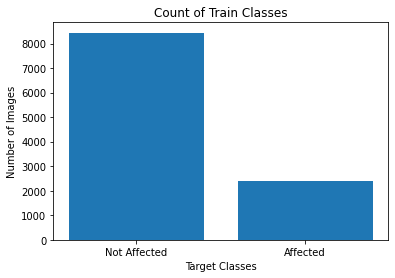

In [ ]:
#Plotting the count of individual class:

classes = ['Not Affected', 'Affected']
count = [totalNegCount,totalPosCount]
plt.bar(classes,count)
plt.xlabel('Target Classes')
plt.ylabel('Number of Images')
plt.title('Count of Train Classes')
plt.show()

Without the class weight assignment, the loss would have been more effected by the negative (majority) class.

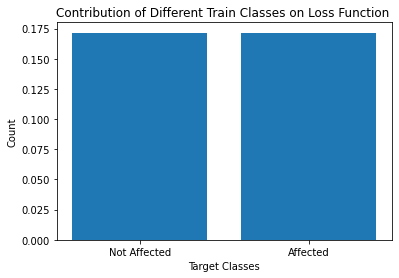

In [ ]:
#Plotting the contribution of each class after assigning the class weights:

classes = ['Not Affected', 'Affected']
count = [neg_contribution,pos_contribution]
plt.bar(classes,count)
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Contribution of Different Train Classes on Loss Function ')
plt.show()

When given the weights properly, both classes effect the loss similarly. 

We have thus solved the data imbalance problem.

***Data Augmentaion Problem:***

In [ ]:
import random

In [ ]:
#https://www.kaggle.com/danofer/ranzcr-chexnet-starter
#https://www.tensorflow.org/tutorials/images/data_augmentation

def build_decoder(with_labels=True, target_size=(300, 300)):
    def decode(path):
        file_bytes = tf.io.read_file(path)
        img = tf.image.decode_png(file_bytes, channels=3)
        img = tf.cast(img, tf.float32) / 255.0
        img = tf.image.resize(img, target_size)

        return img
    
    def decode_with_labels(path, label):
        return decode(path), label
    
    return decode_with_labels if with_labels else decode

def build_augmenter(with_labels=True):
    def augment(img):
        number = random.randint(1,5)
        seed = (1, 5)
        if number == 1:
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.stateless_random_contrast(img,0.2, 0.5,seed)
        if number == 2:
            img = tf.image.stateless_random_flip_up_down(img,seed)
            img = tf.image.stateless_random_brightness(img, 0.2,seed)
        if number == 3:
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.stateless_random_saturation(img, 0.2, 0.5,seed)
        if number == 4:
            img = tf.image.stateless_random_flip_up_down(img,seed)
            img = tf.image.stateless_random_hue(img, 0.2,seed)
        if number == 5:
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.adjust_gamma(img, 0.2)
        return img
    
    def augment_with_labels(img, label):
        return augment(img), label
    
    return augment_with_labels if with_labels else augment

def build_dataset(paths, labels=None, bsize=32, cache=True,
                  decode_fn=None, augment_fn=None,
                  augment=True, repeat=True, shuffle=1024,cache_dir=""):
    if cache_dir != "" and cache is True:
        os.makedirs(cache_dir, exist_ok=True)

    if decode_fn is None:
        decode_fn = build_decoder(labels is not None)
    
    if augment_fn is None:
        augment_fn = build_augmenter(labels is not None)
    
    AUTO = tf.data.experimental.AUTOTUNE
    slices = paths if labels is None else (paths, labels)
    
    dset = tf.data.Dataset.from_tensor_slices(slices)
    dset = dset.map(decode_fn, num_parallel_calls=AUTO)
    dset = dset.cache(cache_dir) if cache else dset
    dset = dset.map(augment_fn, num_parallel_calls=AUTO) if augment else dset
    dset = dset.repeat() if repeat else dset
    dset = dset.shuffle(shuffle) if shuffle else dset
    dset = dset.batch(bsize).prefetch(AUTO)
    
    return dset

In [ ]:
#Building the decoder for building the Train and Valid Dataset:

decoder = build_decoder(with_labels=True, target_size=(256, 256))
print(decoder)

<function build_decoder.<locals>.decode_with_labels at 0x7f4fdd515560>


In [ ]:
#Creating the Augmented Train and Valid Datasets:

dtrain = build_dataset(
    trainPath, trainLabels, bsize=16, decode_fn=decoder,cache_dir='Kaggle/tf_cache'
)

dvalid = build_dataset(
    validPath, validLabels, bsize=16, 
    repeat=False, shuffle=False, augment=False, decode_fn=decoder,cache_dir='Kaggle/tf_cache'
)

In [ ]:
print('Train Dataset : ',dtrain)
print('Valid Dataset : ',dvalid)

Train Dataset :  <PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int64)>
Valid Dataset :  <PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int64)>


In [ ]:
#Assigning the necessary class weights
class_weight = {0: neg_weights, 1: pos_weights}

***Creating the Classification Model using Pre-Trained CheXNet model :***

In [ ]:
##https://www.kaggle.com/danofer/ranzcr-chexnet-starter
#Creating the model:

#Defining the model:
base_model = densenet.DenseNet121(weights = None, include_top=False, input_shape=(256,256,3))

#Adding a dummy layer so that pre-trained weights can be loaded properly. This dummy layer is removed later
predictions = tf.keras.layers.Dense(14,activation='sigmoid', name='predictions')(base_model.output)

base_model2 = tf.keras.Model(inputs = base_model.input, outputs = predictions)

#Loading the pre-trained chexnet weights
base_model2.load_weights('/content/drive/MyDrive/Self Case Study 2/DATASET/brucechou1983_CheXNet_Keras_0.3.0_weights.h5')

#Removing the dummy layer
base_model2.layers.pop()

#Freezing the model
#base_model2.trainable = False

#Adding a pooling layer 
new_base_model = tf.keras.layers.GlobalAveragePooling2D()(base_model2.layers[-3].output)

new_base_model = tf.keras.layers.Dense(1024, activation='relu')(new_base_model)
new_base_model = tf.keras.layers.BatchNormalization()(new_base_model)
new_base_model = tf.keras.layers.Dropout(0.4)(new_base_model)

new_base_model = tf.keras.layers.Dense(512, activation='relu')(new_base_model)
new_base_model = tf.keras.layers.BatchNormalization()(new_base_model)
new_base_model = tf.keras.layers.Dropout(0.4)(new_base_model)

new_base_model = tf.keras.layers.Dense(64, activation='relu')(new_base_model)

#Adding the final Dense layer for prediction
new_base_model = tf.keras.layers.Dense(1, activation='sigmoid')(new_base_model)

#Model built
final_new_model = tf.keras.Model(base_model2.input, new_base_model)

In [ ]:
#Displaying the Last 6 layers
final_new_model.layers[-6:]


In [ ]:
#Displaying the last few layer of the original pre-trained chexnet model
base_model2.layers[-5:-1]

In [ ]:
#Displaying the model:

final_new_model.summary(line_length = 150)

Model: "model_3"
______________________________________________________________________________________________________________________________________________________
Layer (type)                                     Output Shape                     Param #           Connected to                                      
input_2 (InputLayer)                             [(None, 256, 256, 3)]            0                                                                   
______________________________________________________________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)                   (None, 262, 262, 3)              0                 input_2[0][0]                                     
______________________________________________________________________________________________________________________________________________________
conv1/conv (Conv2D)                              (None, 128, 128, 64)        

Checking the input and output of the model created:

In [ ]:
final_new_model.inputs, final_new_model.outputs

([<KerasTensor: shape=(None, 256, 256, 3) dtype=float32 (created by layer 'input_4')>],
 [<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_3')>])

In [ ]:
#Count of the total records in train:
trainPath.shape[0]

10842

***Creating the Callbacks :***

In [ ]:
BATCH_SIZE = 16
#total number of datapooints that should be passed through the network in individual epochs. This is used when we are generating data through augmentations
weighted_steps_per_epoch = trainPath.shape[0] // BATCH_SIZE

#Callback for saving the weights 
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'chexnet_model_new.h5', save_best_only=True, monitor='val_auc', mode='max',restore_best_weights=True)

#Callback for the ReduceLROnPlateau
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_auc", patience=3, min_lr=1e-6, mode='max')

#Callback to stop training if the metric value doesnt change for 6 epochs
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', min_delta=0.0001, patience=6, mode='max',restore_best_weights=True)

***Defining the Metrics:***

In [ ]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

#Adam optimizer
optim = tf.keras.optimizers.Adam(0.0001)

In [ ]:
#Compile the model:
final_new_model.compile(optimizer=optim,loss='binary_crossentropy',metrics=[METRICS])

In [ ]:
dtrain,dvalid

(<PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int64)>)

***Training the model :***

In [ ]:
history = final_new_model.fit(
    dtrain, 
    epochs=50, # training for smaller epochs at a time because kernel is getting disconnected very easily.
    verbose=1,
    callbacks=[checkpoint, lr_reducer,early_stop],
    steps_per_epoch=weighted_steps_per_epoch,
    validation_data=dvalid,
    
    #Giving the class weights here:
    class_weight=class_weight)

Epoch 1/50
677/677 [==============================] - 132s 173ms/step - loss: 0.1886 - tp: 976.7581 - fp: 1104.4425 - tn: 3132.9912 - fn: 217.7847 - accuracy: 0.7278 - precision: 0.4422 - recall: 0.8028 - auc: 0.8323 - val_loss: 0.3224 - val_tp: 233.0000 - val_fp: 138.0000 - val_tn: 805.0000 - val_fn: 40.0000 - val_accuracy: 0.8536 - val_precision: 0.6280 - val_recall: 0.8535 - val_auc: 0.9242
Epoch 2/50
677/677 [==============================] - 117s 173ms/step - loss: 0.1400 - tp: 1025.1903 - fp: 855.5973 - tn: 3381.0413 - fn: 170.1475 - accuracy: 0.8099 - precision: 0.5412 - recall: 0.8560 - auc: 0.8989 - val_loss: 0.3458 - val_tp: 247.0000 - val_fp: 162.0000 - val_tn: 781.0000 - val_fn: 26.0000 - val_accuracy: 0.8454 - val_precision: 0.6039 - val_recall: 0.9048 - val_auc: 0.9351
Epoch 3/50
677/677 [==============================] - 117s 173ms/step - loss: 0.1243 - tp: 1047.4823 - fp: 782.6991 - tn: 3455.5841 - fn: 146.2109 - accuracy: 0.8283 - precision: 0.5724 - recall: 0.8804 - a

In [ ]:
#Saving the model back in the google drive:
!cp  "/content/Pneumothorax/chexnet_model_new.h5" "/content/drive/MyDrive/Self Case Study 2/DATASET/chexnet_model_new.h5"

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
auc = history.history['auc']
precision = history.history['precision']
recall = history.history['recall']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
val_auc = history.history['val_auc']
val_precision = history.history['val_precision']
val_recall = history.history['val_recall']

In [ ]:
print("Metric Values after Training Next 28 Epochs : \n")
print('Train Accuracy : ', acc)
print('Train Loss : ', loss)
print('Train AUC : ', auc)
print('Train Precision : ', precision)
print('Train Recall : ', recall)
print('Train Val_Accuracy : ', val_acc)
print('Train Val_Loss : ', val_loss)
print('Train Val_Auc : ', val_auc)
print('Train Val_Precision : ', val_precision)
print('Train Val_Recall : ', val_recall)
print("==========================================")

Metric Values after Training Next 28 Epochs : 

Train Accuracy :  [0.670236349105835, 0.6407865285873413, 0.6487259864807129, 0.6531572937965393, 0.654634416103363, 0.6687, 0.6625, 0.6704, 0.6739, 0.6786, 0.6793, 0.6907, 0.6953, 0.7477, 0.7421, 0.7501, 0.7649, 0.7662, 0.7742798924446106, 0.7805576324462891, 0.7800959944725037, 0.7859120965003967, 0.7851735353469849, 0.7798804640769958, 0.7884047031402588, 0.7884970307350159, 0.7894202470779419, 0.7894202470779419]
Train Loss :  [0.23398947715759277, 0.22710101306438446, 0.22053559124469757, 0.2157195657491684, 0.2124169021844864, 0.2085, 0.2057, 0.2051, 0.1999, 0.1987, 0.2002, 0.1971, 0.1944, 0.1708, 0.1686, 0.166, 0.1616, 0.1625, 0.16077667474746704, 0.15837281942367554, 0.15744410455226898, 0.15684916079044342, 0.15705318748950958, 0.1564360409975052, 0.15412388741970062, 0.15498390793800354, 0.15514113008975983, 0.15270574390888214]
Train AUC :  [0.6354421973228455, 0.7209659814834595, 0.7459319233894348, 0.7512601613998413, 0.76270

***Evaluating the Final Trained Model :***

In [ ]:
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_recall_curve,average_precision_score,accuracy_score

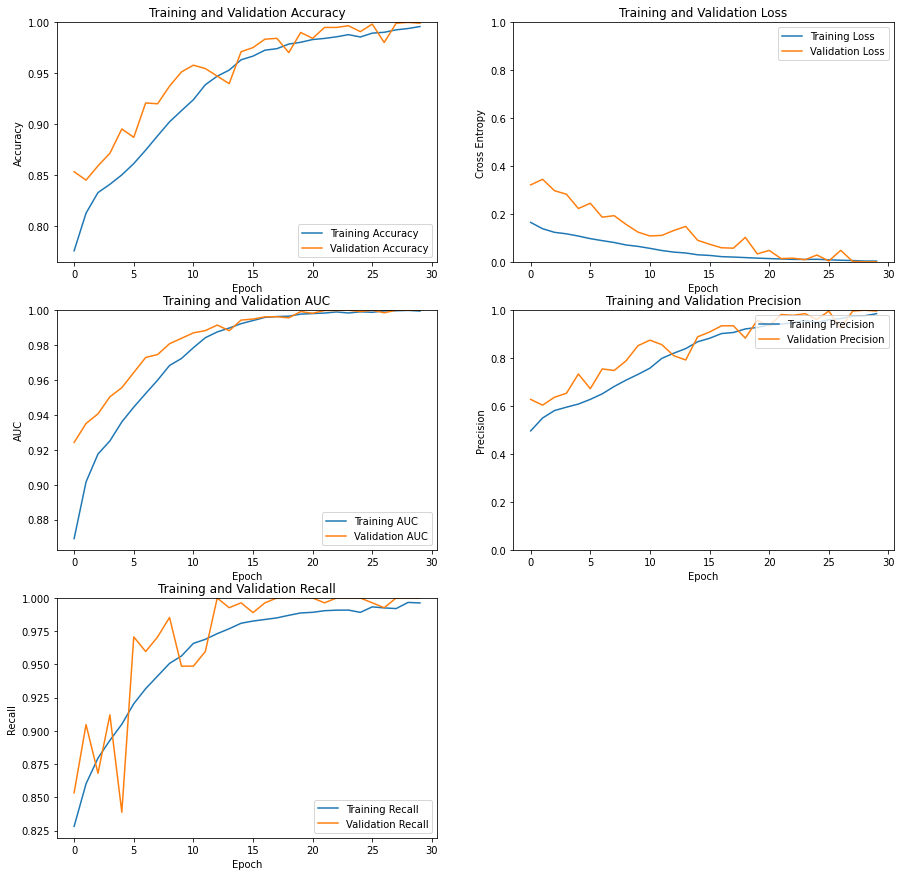

In [ ]:
#Plotting the metrics:

plt.figure(figsize=(15, 15))

#Plotting the Accuracy:
plt.subplot(3, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.xlabel('Epoch')
plt.title('Training and Validation Accuracy')

#Plotting the Loss:
plt.subplot(3, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')

#Plotting the AUC:
plt.subplot(3, 2, 3)
plt.plot(auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.legend(loc='lower right')
plt.ylabel('AUC')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')

#Plotting the Precision:
plt.subplot(3, 2, 4)
plt.plot(precision, label='Training Precision')
plt.plot(val_precision, label='Validation Precision')
plt.legend(loc='upper right')
plt.ylabel('Precision')
plt.ylim([0,1.0])
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')

#Plotting the Recall:
plt.subplot(3, 2, 5)
plt.plot(recall, label='Training Recall')
plt.plot(val_recall, label='Validation Recall')
plt.legend(loc='lower right')
plt.ylabel('Recall')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')

#Showing all the graphs:
plt.show()

Getting the original Train and Valid dataset without the augmentations and class labels:

In [ ]:
test_decoder = build_decoder(with_labels=False, target_size=(256, 256))

train_features = build_dataset(
    trainPath, bsize=BATCH_SIZE, repeat=False, 
    shuffle=False, augment=False, cache=False, 
    decode_fn=test_decoder
)

valid_features = build_dataset(
    validPath, bsize=BATCH_SIZE, repeat=False, 
    shuffle=False, augment=False, cache=False, 
    decode_fn=test_decoder
)

In [ ]:
train_features, valid_features

(<PrefetchDataset shapes: (None, 256, 256, 3), types: tf.float32>,
 <PrefetchDataset shapes: (None, 256, 256, 3), types: tf.float32>)

Getting the predict probabilities on Valid Dataset:

In [ ]:
valid_predictions_baseline = final_new_model.predict(valid_features, batch_size=16)

Getting the Metrics on the Valid Dataset:

In [ ]:
valid_baseline_results = final_new_model.evaluate(dvalid,batch_size=16, verbose=0)

In [ ]:
val_precision = round((valid_baseline_results[6]),5)
val_recall = round((valid_baseline_results[7]),5)
val_loss = round((valid_baseline_results[0]),5)
val_auc = round((valid_baseline_results[8]),5)
print('METRIC VALUES FOR VALID DATASET : \n')
print('PRECISION : ', val_precision)
print('RECALL : ', val_recall)
print('LOSS : ', val_loss)
print('AUC : ', val_auc)

METRIC VALUES FOR VALID DATASET : 

PRECISION :  0.98556
RECALL :  1.0
LOSS :  0.01043
AUC :  0.99998


In [ ]:
valid_baseline_results

[0.010427027940750122,
 273.0,
 4.0,
 939.0,
 0.0,
 0.9967105388641357,
 0.9855595827102661,
 1.0,
 0.9999767541885376]

***Plotting the Graphs:***

Plotting the ROC Curve :

In [ ]:
#https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

def plot_roc(name, labels, predictions):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)
  auc = round(metrics.auc(fp, tp),3)
  
  plt.figure(figsize=(8, 8))
  plt.plot(100*fp, 100*tp, label=name+" = " +str(auc), linewidth=2)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.grid(True)
  plt.title("ROC Curve")
  ax = plt.gca()
  ax.set_aspect('equal')

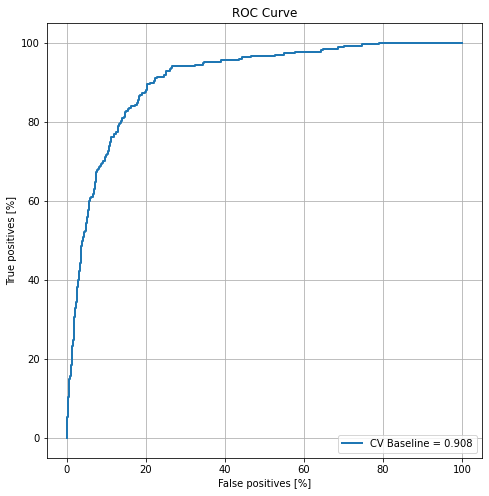

In [ ]:
#Plotting the ROC Curve on CV Dataset:
plot_roc("CV Baseline", validLabels, valid_predictions_baseline)
plt.legend(loc='lower right')

we got a AUC Score of 0.908 on the CV Dataset.

Plotting the Confusion Matrix:

We took the threshold at 0.5 and observed these values for the metrics.

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  tn = cm[0][0]
  fn = cm[1][0]
  fp = cm[0][1]
  tp = cm[1][1]

  sensitivity = round((tp/(tp+fn)),3)
  specificity = round((tn/(tn+fp)),3)
  accuracy = round(((tp + tn)/(tp+tn+fp+fn)),3)
  PPV = round((tp/(tp + fp)),3)
  NPV = round((tn/(tn + fn)),3)
  print('Total Records Detected : ', labels.shape[0])
  print('Total Pneumothorax Cases : ', np.sum(cm[1]))
  print("=====================================")
  print('True Negatives : ', tn)
  print('False Positives : ', fp)
  print('False Negatives : ', fn)
  print('True Positives : ', tp)
  print("=====================================")
  print('Accuracy : ', accuracy)
  print('PPV : ', PPV)
  print('NPV : ', NPV)
  print('Sensitivity : ', sensitivity)
  print('Specificity : ', specificity)
  print("=====================================")

  return tn,fn,fp,tp,sensitivity,specificity,accuracy,PPV,NPV

Total Records Detected :  1205
Total Pneumothorax Cases :  267
True Negatives :  850
False Positives :  88
False Negatives :  80
True Positives :  187
Accuracy :  0.861
PPV :  0.68
NPV :  0.914
Sensitivity :  0.7
Specificity :  0.906


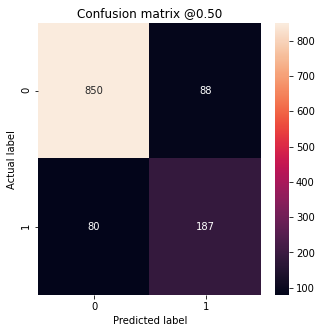

In [ ]:
tn,fn,fp,tp,sensitivity,specificity,accuracy,PPV,NPV = plot_cm(validLabels, valid_predictions_baseline)

Sensitivity and Specificity are two of the most prominent metrics that are used to measure diagnostics tests.

***Sensitivity*** (TRUE POSITIVE RATE) is the probability that the model outputs positive given that the case is actually positive. It shows what portion of the positive class got correctly classified. 

This is also the Recall.


***Specificity*** (TRUE NEGATIVE RATE) is the probability that the model outputs negative given that the case is actually negative. It would mean determining the proportion of healthy people who were correctly identified by the model.

Positive predictive value (***PPV***) is the probability that people with a positive prediction truly have the disease. 

So, PPV of 0.68 means that if a person is predicted to have pneumothorax there is 68% probability that he actually have the disease.

This is also the Precision.



Negative predictive value (***NPV***) is the probability that people with a negative prediction truly don't have the disease. 

So, NPV of 0.914 means that if a person is predicted to not have pneumothorax there is 91.4% probability that he doesnt actually have the disease.

***Sensitivity*** and ***NPV*** are the most important metric values. Since we are dealing with medical data, we have to ***minimise the False Negative*** as the situation where the patient has the disease (ie true label = positive) but the model predicts him to be safe (ie predicted label = negative) can prove to be disastrous. We also need to ***maximise True Postive***.

So we want majority of the postive class to be correctly predicted. Hence, we need a high Sensitivity (TPR). Also , we need high NPV that shows that if the model predicts the person to be healthy, he is actually healthy.

Plotting the Precision_Recall Curve :

In [ ]:
def plot_precision_recall_curve(name, labels, predictions):
  
  class_precision, class_recall, _ = precision_recall_curve(labels, predictions)
  average_precision = round((average_precision_score(labels, predictions)),3)

  plt.figure(figsize=(8, 8))
  plt.plot(100*class_recall, 100*class_precision, label=name +" = "+ str(average_precision), linewidth=2)
  plt.xlabel('Recall [%]')
  plt.ylabel('Precision [%]')
  #plt.xlim([-0.5,20])
  #plt.ylim([80,100.5])
  plt.grid(True)
  plt.legend()
  plt.title("Precision-Recalll Curve")
  ax = plt.gca()
  ax.set_aspect('equal')

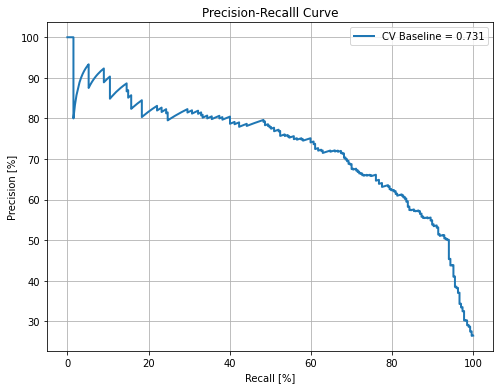

In [ ]:
plot_precision_recall_curve("CV Baseline", validLabels, valid_predictions_baseline)

We got an Average Precision Score of 0.731 on CV Dataset.

The ***Precision-Recall curve*** (PRC) shows the trade-off between precision and recall.

A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

Saving all the metric values in a dataframe:

In [ ]:
saved_loss = round((valid_baseline_results[0]),5)

In [ ]:
data = [{'Values' : accuracy}, {'Values' : val_precision}, {'Values' : val_recall}, {'Values' : sensitivity}, 
        {'Values' : specificity}, {'Values' : PPV}, {'Values' : NPV}, {'Values' : saved_loss}]

labels = ['Accuracy', 'Precision', 'Recall','Sensitivity (Recall)', 'Specificity', 'PPV (Precision)', 'NPV', 'LOSS']
classification_metricValues_df = pd.DataFrame(data, index =labels) 

In [ ]:
classification_metricValues_df

Values
Accuracy              0.86100
Precision             0.98556
Recall                1.00000
Sensitivity (Recall)  0.70000
Specificity           0.90600
PPV (Precision)       0.68000
NPV                   0.91400
LOSS                  0.01043

In [ ]:
#Saving the metric df in disk:
classification_metricValues_df.to_csv('/content/drive/MyDrive/Self Case Study 2/DATASET/classification_metricValues_df_new.csv')

***Checking the Model on the Test Data given:***

Building the Test Dataset without Augmentations:

In [ ]:
test_decoder = build_decoder(with_labels=False, target_size=(256, 256))

dtest = build_dataset(
    imagePath_test, bsize=BATCH_SIZE, repeat=False, 
    shuffle=False, augment=False, cache=False, 
    decode_fn=test_decoder
)

In [ ]:
dtest

<PrefetchDataset shapes: (None, 256, 256, 3), types: tf.float32>

Reading the Test CSV file:

In [ ]:
submission_df = pd.read_csv('/content/drive/MyDrive/Self Case Study 2/DATASET/Test Dataset/stage_2_sample_submission.csv')

In [ ]:
submission_df.head(2)

ImageId  EncodedPixels
0  ID_c68e114ba             -1
1  ID_b5a797789             -1

In [ ]:
#Using the Model to predict the Class Label (NOT MASK):

submission_df['Pneumothorax_Classification'] = final_new_model.predict(dtest, verbose=1)
submission_df.to_csv('/content/drive/MyDrive/Self Case Study 2/DATASET/Test Dataset/Pneumothorax_Classification_Submission_new.csv', index=False)
submission_df.head(2)

201/201 [==============================] - 9s 42ms/step


ImageId  EncodedPixels  Pneumothorax_Classification
0  ID_c68e114ba             -1                 7.935724e-08
1  ID_b5a797789             -1                 2.585854e-04

In [ ]:
#print(np.round(2.613478e-04*100, decimals = 2))

In [ ]:
submission_df.tail(10)

ImageId  EncodedPixels  Pneumothorax_Classification
3195  ID_0f5f33d71             -1                 9.928751e-01
3196  ID_e42b91d9a             -1                 9.709342e-01
3197  ID_bd4fa896c             -1                 7.881337e-02
3198  ID_293b74bdf             -1                 5.949005e-05
3199  ID_74441d7a9             -1                 6.459855e-01
3200  ID_a9cc917b4             -1                 4.487242e-05
3201  ID_5dc70172e             -1                 2.613478e-06
3202  ID_f1b5e5378             -1                 2.429514e-05
3203  ID_ba7f28dac             -1                 3.086227e-07
3204  ID_77ab447a1             -1                 9.998751e-01

We have used the classification model to predict the probability of the class label. 

We will now create the segmentation model that will predict the mask. 

.....................................................................................................................................................

***B) Building the Segmentation Model :***

In [ ]:
from keras import backend as K

In [ ]:
if tf.test.is_gpu_available(cuda_only=True):
  print('working on gpu')
else:
  print('warning: working on cpu')
# print(tf.__version__)
# print(keras.__version__)

print("Tensorflow:",tf.__version__)
print("Keras:",keras.__version__)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
working on gpu
Tensorflow: 2.4.1
Keras: 2.4.3


In [201]:
final_train_df.head(2)

ImageId  ... Target
0  1.2.276.0.7230010.3.1.4.8323329.6904.151787520...  ...      0
1  1.2.276.0.7230010.3.1.4.8323329.13666.15178752...  ...      1

[2 rows x 6 columns]

In [202]:
target = final_train_df['Target']

In [203]:
from sklearn.model_selection import train_test_split
X_Train, X_Cv = train_test_split(final_train_df, stratify=target, test_size=0.1, random_state=42)

print(X_Train.shape)
print(X_Cv.shape)

(10842, 6)
(1205, 6)


In [ ]:
X_Train.head(2)

ImageId  ... Target
10907  1.2.276.0.7230010.3.1.4.8323329.10459.15178752...  ...      0
10005  1.2.276.0.7230010.3.1.4.8323329.12105.15178752...  ...      0

[2 rows x 6 columns]

***Building the TF Data Pipeline:***

In [204]:
import random

In [206]:
#https://www.kaggle.com/danofer/ranzcr-chexnet-starter
#https://www.tensorflow.org/tutorials/images/data_augmentation

def read_image(x):
    file_bytes = tf.io.read_file(x)
    img = tf.image.decode_png(file_bytes, channels=3)
    img = tf.cast(img, tf.float32) / 255.0
    print(img)
    return img

def read_mask(x):
    file_bytes = tf.io.read_file(x)
    mask = tf.image.decode_png(file_bytes, channels=1)
    mask = tf.cast(mask, tf.float32) / 255.0
    print(mask)
    return mask

def augmenter(x,y, augment):
    img = read_image(x)
  
    mask = read_mask(y)

    # Random Augmentations to Image and Mask
    if augment == True:
        number = random.randint(1,5)
        seed = (1, 5)
        if number == 1:
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.stateless_random_contrast(img,0.2, 0.5,seed)

            mask = tf.image.stateless_random_flip_left_right(mask,seed)
            mask = tf.image.stateless_random_contrast(mask,0.2, 0.5,seed)

        if number == 2:
            img = tf.image.stateless_random_flip_up_down(img,seed)
            img = tf.image.stateless_random_brightness(img, 0.2,seed)

            mask = tf.image.stateless_random_flip_left_right(mask,seed)
            mask = tf.image.stateless_random_brightness(mask,0.2,seed)

        if number == 3:
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.stateless_random_saturation(img, 0.2, 0.5,seed)

            mask = tf.image.stateless_random_flip_left_right(mask,seed)
            mask = tf.image.stateless_random_saturation(mask,0.2, 0.5,seed)

        if number == 4:
            img = tf.image.stateless_random_flip_up_down(img,seed)
            img = tf.image.stateless_random_hue(img, 0.2,seed)

            mask = tf.image.stateless_random_flip_up_down(mask,seed)
            mask = tf.image.stateless_random_hue(mask,0.2,seed)

        if number == 5:
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.adjust_gamma(img, 0.2)

            mask = tf.image.stateless_random_flip_left_right(mask,seed)
            mask = tf.image.adjust_gamma(mask,0.2)
      

    return img,mask

In [207]:
#https://www.kaggle.com/danofer/ranzcr-chexnet-starter
#https://www.tensorflow.org/tutorials/images/data_augmentation

def build_dataset(image_paths, mask_paths = None, bsize=32, cache=True,cache_dir="",
                  augment=True, repeat=True, shuffle=1024):
    if cache_dir != "" and cache is True:
        os.makedirs(cache_dir, exist_ok=True)
    
    AUTO = tf.data.experimental.AUTOTUNE
    slices = image_paths if mask_paths is None else (image_paths, mask_paths)
    
    dset = tf.data.Dataset.from_tensor_slices(slices)
    dset = dset.cache(cache_dir) if cache else dset
    dset = dset.map(lambda x,y: augmenter(x,y,augment), num_parallel_calls=AUTO)
    dset = dset.repeat() if repeat else dset
    dset = dset.shuffle(shuffle) if shuffle else dset
    dset = dset.batch(bsize).prefetch(AUTO)
    
    return dset

In [208]:
trainPath, trainLabels = X_Train['ImagePath_Png'], X_Train['MaskPath']
validPath, validLabels = X_Cv['ImagePath_Png'], X_Cv['MaskPath']

In [209]:
print(f"Images: {len(trainPath)} - Masks: {len(trainLabels)}")
print(f"Images: {len(validPath)} - Masks: {len(validLabels)}")

Images: 10842 - Masks: 10842
Images: 1205 - Masks: 1205


In [ ]:
trainPath[1]

'Train Dataset/siim/train_png_images/1.2.276.0.7230010.3.1.4.8323329.13666.1517875247.117800.png'

***Building the Train and Valid Dataset that will be used for all 3 models:***

In [210]:
dtrain = build_dataset(
    trainPath, trainLabels, bsize=16, cache_dir='Kaggle1/tf_cache'
)

dvalid = build_dataset(
    validPath, validLabels, bsize=16, 
    repeat=False, shuffle=False, augment=False,cache_dir='Kaggle1/tf_cache'
)

Tensor("truediv:0", shape=(None, None, 3), dtype=float32)
Tensor("truediv_1:0", shape=(None, None, 1), dtype=float32)
Tensor("truediv:0", shape=(None, None, 3), dtype=float32)
Tensor("truediv_1:0", shape=(None, None, 1), dtype=float32)


In [211]:
dtrain, dvalid

(<PrefetchDataset shapes: ((None, None, None, 3), (None, None, None, 1)), types: (tf.float32, tf.float32)>,
 <PrefetchDataset shapes: ((None, None, None, 3), (None, None, None, 1)), types: (tf.float32, tf.float32)>)

***Defining the Loss :***

In [22]:
#https://www.kaggle.com/meaninglesslives/nested-unet-with-efficientnet-encoder/output#Defining-Dice-Loss

def dice_coef(y_true, y_pred, smooth=1.):
  
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (
                K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    
    
def DiceBCELoss(y_true, y_pred):    
     
    BCE =  binary_crossentropy(y_true, y_pred)   
    dice_loss = 1 - dice_coef(y_true, y_pred, smooth=1)
    Dice_BCE = BCE + dice_loss
    
    return Dice_BCE

In [180]:
from keras.models import Model
from keras.layers import Input
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras import backend as K

In [21]:
BATCH_SIZE = 16

**Segmentation Model 1:**

***Creating the Unet Architecture :***

In [255]:
inputs = Input((256, 256, 3))

c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (inputs)
c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(64, (3, 3), activation='relu', padding='same') (p4)
c5 = Conv2D(64, (3, 3), activation='relu', padding='same') (c5)
p5 = MaxPooling2D(pool_size=(2, 2)) (c5)

c55 = Conv2D(128, (3, 3), activation='relu', padding='same') (p5)
c55 = Conv2D(128, (3, 3), activation='relu', padding='same') (c55)

u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c55)
u6 = concatenate([u6, c5])
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)

u71 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u71 = concatenate([u71, c4])
c71 = Conv2D(32, (3, 3), activation='relu', padding='same') (u71)
c61 = Conv2D(32, (3, 3), activation='relu', padding='same') (c71)

u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c61)
u7 = concatenate([u7, c3])
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss=DiceBCELoss, metrics=[dice_coef])

***Creating the Callbacks:***

In [ ]:
import datetime

# Define optimizer
optim = tf.keras.optimizers.Adam(0.0001)

filepath= "best_UnetModel.hdf5"

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_dice_coef', 
                             verbose=1, save_best_only=True, mode='max',restore_best_weights=True)

#Callback for the ReduceLROnPlateau
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_dice_coef", patience=3, min_lr=1e-6, mode='max')


#Callback to stop training if the metric value doesnt change for 6 epochs
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_dice_coef', min_delta=0.0001, patience=6, mode='max',restore_best_weights=True)

callback_list = [checkpoint,lr_reducer,early_stop]
callback_list1 = [checkpoint]
weighted_train_steps_per_epoch = 10842//16 
weighted_val_steps_per_epoch = 1205 // 16 

In [ ]:
weighted_train_steps_per_epoch, weighted_val_steps_per_epoch

(677, 75)

In [ ]:
#ORIGINAL UNET MODEL

from tensorflow.keras.losses import binary_crossentropy
model.compile(optimizer=optim, loss=DiceBCELoss, metrics=[dice_coef])
history_epoch1to10 = model.fit(dtrain,
                    validation_data=dvalid,
                    epochs=10, 
                    verbose=1, 
                    callbacks=callback_list,
                    steps_per_epoch=weighted_train_steps_per_epoch,
                    validation_steps=weighted_val_steps_per_epoch)

Epoch 1/10
677/677 [==============================] - 68s 69ms/step - loss: 1.2269 - dice_coef: 0.0745 - val_loss: 0.7915 - val_dice_coef: 0.2095

Epoch 00001: val_dice_coef improved from -inf to 0.20951, saving model to best_UnetModel.hdf5
Epoch 2/10
677/677 [==============================] - 47s 69ms/step - loss: 0.8299 - dice_coef: 0.1709 - val_loss: 0.7911 - val_dice_coef: 0.2091

Epoch 00002: val_dice_coef did not improve from 0.20951
Epoch 3/10
677/677 [==============================] - 47s 70ms/step - loss: 0.8296 - dice_coef: 0.1708 - val_loss: 0.7908 - val_dice_coef: 0.2095

Epoch 00003: val_dice_coef did not improve from 0.20951
Epoch 4/10
677/677 [==============================] - 46s 67ms/step - loss: 0.8217 - dice_coef: 0.1786 - val_loss: 0.7907 - val_dice_coef: 0.2095

Epoch 00004: val_dice_coef did not improve from 0.20951
Epoch 5/10
677/677 [==============================] - 46s 68ms/step - loss: 0.8404 - dice_coef: 0.1599 - val_loss: 0.7908 - val_dice_coef: 0.2096

Epo

In [ ]:
loss = history_epoch1to10.history['loss']
dice_coef = history_epoch1to10.history['dice_coef']
val_loss = history_epoch1to10.history['val_loss']
val_dice_coef = history_epoch1to10.history['val_dice_coef']

In [ ]:
print("Metric Values after Training first 10 Epochs : \n")

print('Train Loss : ', loss)
print('Train Dice_Coef : ', dice_coef)
print('Train Val_Loss : ', val_loss)
print('Train Val_Dice_Coef : ', val_dice_coef)
print("==========================================")

Metric Values after Training first 10 Epochs : 

Train Loss :  [0.980292022228241, 0.8399971723556519, 0.8317211270332336, 0.8253339529037476, 0.8351024985313416, 0.8361797332763672, 0.8256649971008301]
Train Dice_Coef :  [0.12615635991096497, 0.16096097230911255, 0.16865569353103638, 0.1749866008758545, 0.16528819501399994, 0.16416063904762268, 0.17463813722133636]
Train Val_Loss :  [0.7915425896644592, 0.7911357879638672, 0.7907902002334595, 0.7907414436340332, 0.7907884120941162, 0.7907432913780212, 0.7907608151435852]
Train Val_Dice_Coef :  [0.20951394736766815, 0.2091258317232132, 0.20946775376796722, 0.2095085233449936, 0.20957188308238983, 0.20956026017665863, 0.20947568118572235]


***Loading the model again and training for few more epochs without the early stop callback:***

In [ ]:
model.load_weights("best_UnetModel.hdf5")
callback_list1 = [checkpoint]

In [ ]:
model.compile(optimizer=optim, loss=DiceBCELoss, metrics=[dice_coef])
history_epoch11to50 = model.fit(dtrain,
                    validation_data=dvalid,
                    epochs=40, 
                    verbose=1, 
                    callbacks=callback_list1,
                    steps_per_epoch=weighted_train_steps_per_epoch,
                    validation_steps=weighted_val_steps_per_epoch)

Epoch 1/40
677/677 [==============================] - 63s 83ms/step - loss: 0.8278 - dice_coef: 0.1724 - val_loss: 0.7918 - val_dice_coef: 0.2084

Epoch 00001: val_dice_coef did not improve from 0.20852
Epoch 2/40
677/677 [==============================] - 56s 83ms/step - loss: 0.8247 - dice_coef: 0.1755 - val_loss: 0.7917 - val_dice_coef: 0.2085

Epoch 00002: val_dice_coef did not improve from 0.20852
Epoch 3/40
677/677 [==============================] - 58s 85ms/step - loss: 0.8339 - dice_coef: 0.1664 - val_loss: 0.7913 - val_dice_coef: 0.2089

Epoch 00003: val_dice_coef improved from 0.20852 to 0.20889, saving model to best_UnetModel.hdf5
Epoch 4/40
677/677 [==============================] - 61s 90ms/step - loss: 0.8088 - dice_coef: 0.1914 - val_loss: 0.7917 - val_dice_coef: 0.2085

Epoch 00004: val_dice_coef did not improve from 0.20889
Epoch 5/40
677/677 [==============================] - 57s 84ms/step - loss: 0.8357 - dice_coef: 0.1645 - val_loss: 0.7916 - val_dice_coef: 0.2086



***Saving the Metric values:***

In [ ]:
loss = history_epoch11to50.history['loss']
dice_coef = history_epoch11to50.history['dice_coef']
val_loss = history_epoch11to50.history['val_loss']
val_dice_coef = history_epoch11to50.history['val_dice_coef']

Text(0.5, 0, 'Epoch')

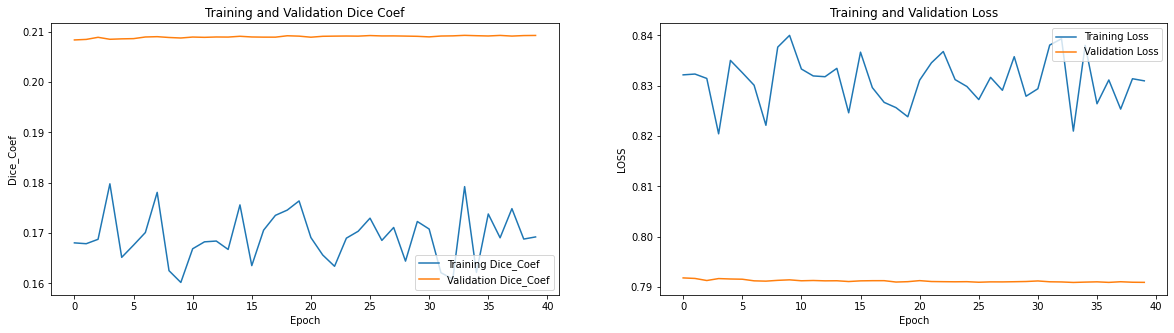

In [ ]:
#Plotting the metrics:

plt.figure(figsize=(20, 5))

#Plotting the Accuracy:
plt.subplot(1, 2, 1)
plt.plot(dice_coef, label='Training Dice_Coef')
plt.plot(val_dice_coef, label='Validation Dice_Coef')
plt.legend(loc='lower right')
plt.ylabel('Dice_Coef')
plt.xlabel('Epoch')
plt.title('Training and Validation Dice Coef')

#Plotting the Loss:
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('LOSS')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')

In [ ]:
#Saving the model in the google drive:
!cp  "/content/Pneumothorax/best_UnetModel.hdf5" "/content/drive/MyDrive/Self Case Study 2/DATASET/best_UnetModel.hdf5"

In [25]:
model.inputs, model.outputs

([<KerasTensor: shape=(None, 256, 256, 3) dtype=float32 (created by layer 'input_1')>],
 [<KerasTensor: shape=(None, 256, 256, 1) dtype=float32 (created by layer 'conv2d_22')>])

In [24]:
#Loading the model:
model.load_weights("/content/drive/MyDrive/Self Case Study 2/DATASET/best_UnetModel.hdf5")

***Displaying the predicted masks:***

In [190]:
def read_image(path):
    x = tf.io.read_file(path)
    x = tf.image.decode_png(x, channels=3)
    x = tf.image.convert_image_dtype(x, tf.float32)
    return x

def read_mask(path):
    y = tf.io.read_file(path)
    y = tf.image.decode_png(y, channels=1)
    y = tf.image.convert_image_dtype(y, tf.float32)
    return y

In [191]:
def predict_mask(x,y):
    img = read_image(x)
    og_mask = read_mask(y)
    predicted_mask  = model.predict(img[np.newaxis,:,:,:])
    #predicted_mask = model.predict(tf.expand_dims(img,axis=0))
    return img,og_mask,predicted_mask

In [ ]:
image = final_train_df['ImagePath_Png'][1]
mask = final_train_df['MaskPath'][1]
img,og_mask,predicted_mask = predict_mask(image,mask)

In [29]:
img.shape

TensorShape([256, 256, 3])

In [34]:
predicted_mask

array([[[[3.6481140e-07],
         [8.4939686e-08],
         [2.5027630e-10],
         ...,
         [1.1791938e-08],
         [4.7223512e-08],
         [9.8431443e-08]],

        [[1.9137009e-10],
         [9.4543857e-08],
         [2.3349245e-13],
         ...,
         [4.2435877e-09],
         [1.4427948e-09],
         [7.7407192e-09]],

        [[4.7233537e-11],
         [4.0581064e-08],
         [6.3916199e-12],
         ...,
         [4.8855684e-13],
         [9.5315221e-11],
         [9.1083010e-08]],

        ...,

        [[1.1400811e-08],
         [2.1220747e-14],
         [3.2516982e-09],
         ...,
         [4.1418455e-17],
         [1.0468104e-07],
         [1.6688173e-08]],

        [[9.8001240e-10],
         [1.4638910e-07],
         [7.3708676e-08],
         ...,
         [9.7922287e-12],
         [3.6798231e-10],
         [7.5368455e-08]],

        [[1.2261387e-07],
         [5.1745785e-09],
         [9.0116345e-08],
         ...,
         [1.3408740e-11],
        

In [ ]:
threshold_unet = 1.25*10**-8

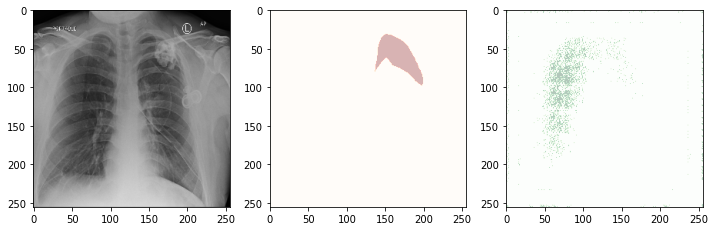

In [52]:
fig, axs = plt.subplots(1, 3, figsize=(3*4, 1*4))
print(axs)
axs[0].imshow(img)
axs[1].imshow(og_mask[:,:,0],cmap='OrRd', alpha=0.3)
axs[2].imshow(np.squeeze(predicted_mask[0,:,:,0]>threshold_unet), cmap='Greens', alpha = 0.3)
plt.show()

With the Vanilla UNET architecture we did not get good prediction for segmented mask. 

From the plots also, it is quite understandable that the validation loss is not getting reduced on further epochs so the model is not learning much new information. This explains the bad segmented mask that is predicted. 

Let's try other a little advanced architecture.

***Finding the dice coefs for each train image:***

In [ ]:
smooth = 1.
def dice_coef(y_true, y_pred, smooth=1.):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [ ]:
dice_coefs = []
for i in tqdm(range(len(final_train_df))):
    image = final_train_df['ImagePath_Png'].values[i]
    mask = final_train_df['MaskPath'].values[i]
    img,og_mask,predicted_mask = predict_mask(image,mask)
    og_mask = np.expand_dims(og_mask, axis=0)
    y_true = K.flatten(og_mask)
    y_pred = K.flatten(predicted_mask)
    dice = dice_coef(y_true, y_pred)
    dice_coefs.append(dice.numpy())

print("Done")

100%|██████████| 12047/12047 [08:14<00:00, 24.34it/s]

Done


In [ ]:
final_output_train_df = final_train_df.copy()
final_output_train_df['dice_coef'] = dice_coefs

In [ ]:
final_output_train_df['dice_coef'].head(5)

0    0.999971
1    0.117617
2    0.999906
3    0.446557
4    0.079315
Name: dice_coef, dtype: float64

In [ ]:
final_output_train_df['dice_coef'].describe()

count    12047.000000
mean         0.867586
std          0.267863
min          0.024738
25%          0.999165
50%          0.999789
75%          0.999894
max          0.999997
Name: dice_coef, dtype: float64

We will visualize which images have high and low dice-coefs later.

...............................................................................................................................................

**Segmentation Model 2 :**

***Creating Nested Unet Architecture:***

In [18]:
smooth = 1.
dropout_rate = 0.5

In [19]:
#https://github.com/CarryHJR/Nested-UNet
#https://www.kaggle.com/ekhtiar/tf-tutorial-semantic-segmentation-with-u-net/output

from tensorflow.keras.regularizers import l2
def standard_unit(input_tensor, stage, nb_filter, kernel_size=3):

    act = 'relu'

    x = Conv2D(nb_filter, (kernel_size, kernel_size), activation=act, name='conv'+stage+'_1', kernel_initializer = 'he_normal', padding='same', kernel_regularizer=l2(1e-4))(input_tensor)
    x = Dropout(dropout_rate, name='dp'+stage+'_1')(x)
    x = Conv2D(nb_filter, (kernel_size, kernel_size), activation=act, name='conv'+stage+'_2', kernel_initializer = 'he_normal', padding='same', kernel_regularizer=l2(1e-4))(x)
    x = Dropout(dropout_rate, name='dp'+stage+'_2')(x)

    return x

def Nest_Net(img_rows, img_cols, color_type=3, num_class=1, deep_supervision=False):

    nb_filter = [32,64,128,256,512]
    act = 'relu'

    bn_axis = 3
    img_input = Input(shape=(img_rows, img_cols, color_type), name='main_input')

    conv1_1 = standard_unit(img_input, stage='11', nb_filter=nb_filter[0])
    pool1 = MaxPool2D((2, 2), strides=(2, 2), name='pool1')(conv1_1)

    conv2_1 = standard_unit(pool1, stage='21', nb_filter=nb_filter[1])
    pool2 = MaxPool2D((2, 2), strides=(2, 2), name='pool2')(conv2_1)

    up1_2 = Conv2DTranspose(nb_filter[0], (2, 2), strides=(2, 2), name='up12', padding='same')(conv2_1)
    conv1_2 = concatenate([up1_2, conv1_1], name='merge12', axis=bn_axis)
    conv1_2 = standard_unit(conv1_2, stage='12', nb_filter=nb_filter[0])

    conv3_1 = standard_unit(pool2, stage='31', nb_filter=nb_filter[2])
    pool3 = MaxPool2D((2, 2), strides=(2, 2), name='pool3')(conv3_1)

    up2_2 = Conv2DTranspose(nb_filter[1], (2, 2), strides=(2, 2), name='up22', padding='same')(conv3_1)
    conv2_2 = concatenate([up2_2, conv2_1], name='merge22', axis=bn_axis)
    conv2_2 = standard_unit(conv2_2, stage='22', nb_filter=nb_filter[1])

    up1_3 = Conv2DTranspose(nb_filter[0], (2, 2), strides=(2, 2), name='up13', padding='same')(conv2_2)
    conv1_3 = concatenate([up1_3, conv1_1, conv1_2], name='merge13', axis=bn_axis)
    conv1_3 = standard_unit(conv1_3, stage='13', nb_filter=nb_filter[0])

    conv4_1 = standard_unit(pool3, stage='41', nb_filter=nb_filter[3])
    pool4 = MaxPool2D((2, 2), strides=(2, 2), name='pool4')(conv4_1)

    up3_2 = Conv2DTranspose(nb_filter[2], (2, 2), strides=(2, 2), name='up32', padding='same')(conv4_1)
    conv3_2 = concatenate([up3_2, conv3_1], name='merge32', axis=bn_axis)
    conv3_2 = standard_unit(conv3_2, stage='32', nb_filter=nb_filter[2])

    up2_3 = Conv2DTranspose(nb_filter[1], (2, 2), strides=(2, 2), name='up23', padding='same')(conv3_2)
    conv2_3 = concatenate([up2_3, conv2_1, conv2_2], name='merge23', axis=bn_axis)
    conv2_3 = standard_unit(conv2_3, stage='23', nb_filter=nb_filter[1])

    up1_4 = Conv2DTranspose(nb_filter[0], (2, 2), strides=(2, 2), name='up14', padding='same')(conv2_3)
    conv1_4 = concatenate([up1_4, conv1_1, conv1_2, conv1_3], name='merge14', axis=bn_axis)
    conv1_4 = standard_unit(conv1_4, stage='14', nb_filter=nb_filter[0])

    conv5_1 = standard_unit(pool4, stage='51', nb_filter=nb_filter[4])

    up4_2 = Conv2DTranspose(nb_filter[3], (2, 2), strides=(2, 2), name='up42', padding='same')(conv5_1)
    conv4_2 = concatenate([up4_2, conv4_1], name='merge42', axis=bn_axis)
    conv4_2 = standard_unit(conv4_2, stage='42', nb_filter=nb_filter[3])

    up3_3 = Conv2DTranspose(nb_filter[2], (2, 2), strides=(2, 2), name='up33', padding='same')(conv4_2)
    conv3_3 = concatenate([up3_3, conv3_1, conv3_2], name='merge33', axis=bn_axis)
    conv3_3 = standard_unit(conv3_3, stage='33', nb_filter=nb_filter[2])

    up2_4 = Conv2DTranspose(nb_filter[1], (2, 2), strides=(2, 2), name='up24', padding='same')(conv3_3)
    conv2_4 = concatenate([up2_4, conv2_1, conv2_2, conv2_3], name='merge24', axis=bn_axis)
    conv2_4 = standard_unit(conv2_4, stage='24', nb_filter=nb_filter[1])

    up1_5 = Conv2DTranspose(nb_filter[0], (2, 2), strides=(2, 2), name='up15', padding='same')(conv2_4)
    conv1_5 = concatenate([up1_5, conv1_1, conv1_2, conv1_3, conv1_4], name='merge15', axis=bn_axis)
    conv1_5 = standard_unit(conv1_5, stage='15', nb_filter=nb_filter[0])

    nestnet_output_1 = Conv2D(num_class, (1, 1), activation='sigmoid', name='output_1', kernel_initializer = 'he_normal', padding='same', kernel_regularizer=l2(1e-4))(conv1_2)
    nestnet_output_2 = Conv2D(num_class, (1, 1), activation='sigmoid', name='output_2', kernel_initializer = 'he_normal', padding='same', kernel_regularizer=l2(1e-4))(conv1_3)
    nestnet_output_3 = Conv2D(num_class, (1, 1), activation='sigmoid', name='output_3', kernel_initializer = 'he_normal', padding='same', kernel_regularizer=l2(1e-4))(conv1_4)
    nestnet_output_4 = Conv2D(num_class, (1, 1), activation='sigmoid', name='output_4', kernel_initializer = 'he_normal', padding='same', kernel_regularizer=l2(1e-4))(conv1_5)

    if deep_supervision:
        model = Model(img_input, [nestnet_output_1,nestnet_output_2,nestnet_output_3,nestnet_output_4])
    else:
        model = Model(img_input, [nestnet_output_4])
    
    return model

***Creating Callbacks :***

In [ ]:
import datetime
from tensorflow.keras.optimizers import Adam
# Define optimizer
adam = Adam(lr = 0.05, epsilon = 0.1)

filepath= "best_nestedUnetModel_new.hdf5"

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_dice_coef', 
                             verbose=1, save_best_only=True, mode='max',restore_best_weights=True)

#Callback for the ReduceLROnPlateau
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_dice_coef", patience=3, min_lr=1e-6, mode='max')


#Callback to stop training if the metric value doesnt change for 6 epochs
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_dice_coef', min_delta=0.0001, patience=6, mode='max',restore_best_weights=True)

callback_list_new = [checkpoint,lr_reducer,early_stop]
callback_list1 = [checkpoint,lr_reducer]
callback_list_new1 = [checkpoint]
weighted_train_steps_per_epoch = 10842//16 
weighted_val_steps_per_epoch = 1205 // 16 

In [54]:
#https://www.kaggle.com/ekhtiar/tf-tutorial-semantic-segmentation-with-u-net/output#Loss-Functions
def dice_coef(y_true, y_pred, smooth=1.):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (
                K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    
    
def DiceBCELoss(y_true, y_pred):    
     
    BCE =  binary_crossentropy(y_true, y_pred)   
    dice_loss = 1 - dice_coef(y_true, y_pred, smooth=1)
    Dice_BCE = BCE + dice_loss
    
    return Dice_BCE

In [53]:
from tensorflow import reduce_sum
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPool2D, Dropout, concatenate, Flatten
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split

In [142]:
# Getting the model
nested_unet_model = Nest_Net(256, 256, color_type=3, num_class=1, deep_supervision=False)
nested_unet_model.compile(optimizer=adam, loss=DiceBCELoss, metrics=[dice_coef])

In [ ]:
nested_unet_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv11_1 (Conv2D)               (None, 256, 256, 32) 896         main_input[0][0]                 
__________________________________________________________________________________________________
dp11_1 (Dropout)                (None, 256, 256, 32) 0           conv11_1[0][0]                   
__________________________________________________________________________________________________
conv11_2 (Conv2D)               (None, 256, 256, 32) 9248        dp11_1[0][0]                     
____________________________________________________________________________________________

In [ ]:
nested_Unet_history = nested_unet_model.fit(dtrain,
                    validation_data=dvalid,
                    epochs=30, 
                    verbose=1, 
                    callbacks=callback_list_new,
                    steps_per_epoch=weighted_train_steps_per_epoch,
                    validation_steps=1205 // 16)

Epoch 1/30
677/677 [==============================] - 300s 433ms/step - loss: 1.7348 - dice_coef: 0.1066 - val_loss: 1.4751 - val_dice_coef: 0.2096

Epoch 00001: val_dice_coef improved from -inf to 0.20957, saving model to best_nestedUnetModel_new.hdf5
Epoch 2/30
677/677 [==============================] - 293s 432ms/step - loss: 1.4895 - dice_coef: 0.1789 - val_loss: 1.4055 - val_dice_coef: 0.2096

Epoch 00002: val_dice_coef did not improve from 0.20957
Epoch 3/30
677/677 [==============================] - 293s 432ms/step - loss: 1.4245 - dice_coef: 0.1732 - val_loss: 1.3351 - val_dice_coef: 0.2096

Epoch 00003: val_dice_coef did not improve from 0.20957
Epoch 4/30
677/677 [==============================] - 292s 432ms/step - loss: 1.3642 - dice_coef: 0.1639 - val_loss: 1.2694 - val_dice_coef: 0.2096

Epoch 00004: val_dice_coef did not improve from 0.20957
Epoch 5/30
677/677 [==============================] - 293s 432ms/step - loss: 1.2904 - dice_coef: 0.1873 - val_loss: 1.2631 - val_di

In [ ]:
#Saving the model in the google drive:
!cp  "/content/Pneumothorax/best_nestedUnetModel_new.hdf5" "/content/drive/MyDrive/Self Case Study 2/DATASET/best_nestedUnetModel_new.hdf5"

In [ ]:
loss = nested_Unet_history.history['loss']
dice_coef = nested_Unet_history.history['dice_coef']
val_loss = nested_Unet_history.history['val_loss']
val_dice_coef = nested_Unet_history.history['val_dice_coef']

***Loading the model again and training it for few more epochs:***

In [ ]:
nested_Unet_history1 = nested_unet_model.fit(dtrain,
                    validation_data=dvalid,
                    epochs=30, 
                    verbose=1, 
                    callbacks=callback_list_new1,
                    steps_per_epoch=weighted_train_steps_per_epoch,
                    validation_steps=1205 // 16)

Epoch 1/30
677/677 [==============================] - 295s 432ms/step - loss: 1.5125 - dice_coef: 0.1725 - val_loss: 1.4741 - val_dice_coef: 0.2096

Epoch 00001: val_dice_coef improved from -inf to 0.20957, saving model to best_nestedUnetModel_new.hdf5
Epoch 2/30
677/677 [==============================] - 293s 432ms/step - loss: 1.5146 - dice_coef: 0.1694 - val_loss: 1.4731 - val_dice_coef: 0.2096

Epoch 00002: val_dice_coef did not improve from 0.20957
Epoch 3/30
677/677 [==============================] - 293s 432ms/step - loss: 1.5157 - dice_coef: 0.1674 - val_loss: 1.4722 - val_dice_coef: 0.2096

Epoch 00003: val_dice_coef did not improve from 0.20957
Epoch 4/30
677/677 [==============================] - 292s 432ms/step - loss: 1.5142 - dice_coef: 0.1679 - val_loss: 1.4712 - val_dice_coef: 0.2096

Epoch 00004: val_dice_coef did not improve from 0.20957
Epoch 5/30
677/677 [==============================] - 292s 432ms/step - loss: 1.5060 - dice_coef: 0.1751 - val_loss: 1.4703 - val_di

In [ ]:
!cp  "/content/Pneumothorax/best_nestedUnetModel_new.hdf5" "/content/drive/MyDrive/Self Case Study 2/DATASET/best_nestedUnetModel_new.hdf5"

***Plotting the metrics:***

In [ ]:
loss = nested_Unet_history1.history['loss']
dice_coef = nested_Unet_history1.history['dice_coef']
val_loss = nested_Unet_history1.history['val_loss']
val_dice_coef = nested_Unet_history1.history['val_dice_coef']

Text(0.5, 0, 'Epoch')

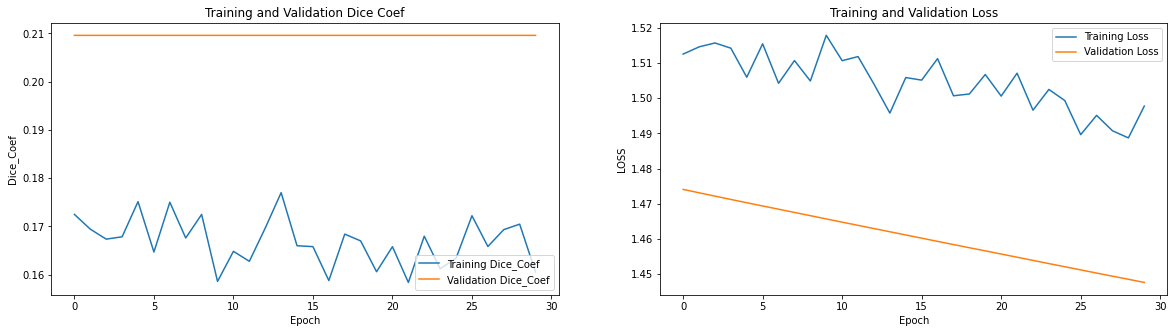

In [ ]:
#Plotting the metrics:

plt.figure(figsize=(20, 5))

#Plotting the Dice_Coef:
plt.subplot(1, 2, 1)
plt.plot(dice_coef, label='Training Dice_Coef')
plt.plot(val_dice_coef, label='Validation Dice_Coef')
plt.legend(loc='lower right')
plt.ylabel('Dice_Coef')
#plt.ylim([min(plt.ylim()),1])
plt.xlabel('Epoch')
plt.title('Training and Validation Dice Coef')

#Plotting the Loss:
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('LOSS')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')

***Displaying the segmented masks:***

In [143]:
nested_unet_model.load_weights("/content/drive/MyDrive/Self Case Study 2/DATASET/best_nestedUnetModel_new.hdf5")

In [193]:
def predict_mask_nestedUnet(x,y):
    img = read_image(x)
    og_mask = read_mask(y)
    predicted_mask  = nested_unet_model.predict(img[np.newaxis,:,:,:])
    #predicted_mask = model.predict(tf.expand_dims(img,axis=0))
    return img,og_mask,predicted_mask

In [194]:
image = final_train_df['ImagePath_Png'][1]
mask = final_train_df['MaskPath'][1]
img,og_mask,predicted_mask = predict_mask_nestedUnet(image,mask)
print(img.shape,og_mask.shape, predicted_mask.shape)

(256, 256, 3) (256, 256, 1) (1, 256, 256, 1)


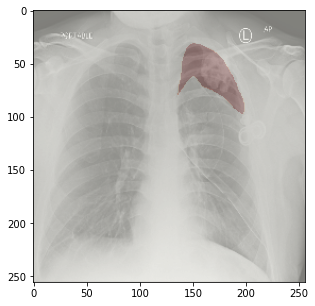

In [146]:
fig = plt.figure(figsize=(5,5))
plt.imshow(img,cmap=plt.cm.gray)
plt.imshow(og_mask[:,:,0],cmap='OrRd', alpha=0.3)
plt.imshow(predicted_mask[0,:,:,0], cmap='Greens', alpha = 0.3)
plt.show()

***Getting the dice coefs for each train image:***

In [ ]:
dice_coefs = []
for i in tqdm(range(len(final_train_df))):
    image = final_train_df['ImagePath_Png'].values[i]
    mask = final_train_df['MaskPath'].values[i]
    img,og_mask,predicted_mask = predict_mask_nestedUnet(image,mask)
    og_mask = np.expand_dims(og_mask, axis=0)
    y_true = K.flatten(og_mask)
    y_pred = K.flatten(predicted_mask)
    dice = dice_coef(y_true, y_pred)
    dice_coefs.append(dice.numpy())

print("Done")

100%|██████████| 12047/12047 [09:35<00:00, 20.94it/s]

Done


In [ ]:
final_output_train_df['dice_coefs_nestedUnet'] = dice_coefs

In [ ]:
final_output_train_df['dice_coefs_nestedUnet'].describe()

count    12047.000000
mean         0.867791
std          0.267946
min          0.024738
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: dice_coefs_nestedUnet, dtype: float64

In [ ]:
!cp  -r "/content/Pneumothorax/Kaggle1" "/content/drive/MyDrive/Self Case Study 2/DATASET/Kaggle1"

In [ ]:
!cp  "pixel_count_df.csv" "/content/drive/MyDrive/Self Case Study 2/DATASET/pixel_count_df.csv"

**Segmentation Model 3:**

***Creating Nested Unet with Weighted Loss:***

In [ ]:
dtrain = build_dataset(
    trainPath, trainLabels, bsize=16, cache_dir='Kaggle1/tf_cache'
)

dvalid = build_dataset(
    validPath, validLabels, bsize=16, 
    repeat=False, shuffle=False, augment=False,cache_dir='Kaggle1/tf_cache'
)

Tensor("truediv:0", shape=(None, None, 3), dtype=float32)
Tensor("truediv_1:0", shape=(None, None, 1), dtype=float32)
Tensor("truediv:0", shape=(None, None, 3), dtype=float32)
Tensor("truediv_1:0", shape=(None, None, 1), dtype=float32)


In [ ]:
dtrain,dvalid

(<PrefetchDataset shapes: ((None, None, None, 3), (None, None, None, 1)), types: (tf.float32, tf.float32)>,
 <PrefetchDataset shapes: ((None, None, None, 3), (None, None, None, 1)), types: (tf.float32, tf.float32)>)

Using the class weights that we got for classification model.

In [55]:
##https://harshjadhav100.medium.com/siim-acr-pneumothorax-segmentation-d92af3086b51
def w_bce( y_true, y_pred, weight1=0.78  , weight0=0.22 ) :
    
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    y_true = K.clip(y_true, K.epsilon(), 1-K.epsilon())
    y_pred = K.clip(y_pred, K.epsilon(), 1-K.epsilon())
    logloss = -(y_true * K.log(y_pred) * weight1 + (1 - y_true) * K.log(1 - y_pred) * weight0 )
    return K.mean(logloss, axis=-1)


def w_dice_coef(y_true, y_pred, w_0=0.22, w_1=0.78):
    
    y_true_f_1 = K.flatten(y_true)
    y_pred_f_1 = K.flatten(y_pred)
    y_true_f_0 = K.flatten(1-y_true)
    y_pred_f_0 = K.flatten(1-y_pred)

    intersection_0 = K.sum(y_true_f_0 * y_pred_f_0)
    intersection_1 = K.sum(y_true_f_1 * y_pred_f_1)

    return (2 * (w_0 * intersection_0 + w_1 * intersection_1) / 
            ((w_0 * (K.sum(y_true_f_0) + K.sum(y_pred_f_0))) + (w_1 * (K.sum(y_true_f_1) + K.sum(y_pred_f_1)))))
    
smooth = 1.
def w_bce_dice_loss(y_true, y_pred):
    
    return w_bce(y_true, y_pred, weight1=0.78 , weight0=0.22) + (1 - w_dice_coef(y_true, y_pred, w_0=0.22, w_1=0.78))

In [57]:
import datetime
from tensorflow.keras.optimizers import Adam
# Define optimizer
adam = Adam(lr = 0.05, epsilon = 0.1)

filepath= "best_nestedUnetModel_noAug.hdf5"

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_w_dice_coef', 
                             verbose=1, save_best_only=True, mode='max',restore_best_weights=True)

#Callback for the ReduceLROnPlateau
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_w_dice_coef", patience=3, min_lr=1e-6, mode='max')


#Callback to stop training if the metric value doesnt change for 6 epochs
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_w_dice_coef', min_delta=0.0001, patience=6, mode='max',restore_best_weights=True)

callback_list_new_noAug = [checkpoint,lr_reducer,early_stop]
callback_list1 = [checkpoint,lr_reducer]
callback_list_new1_noAug = [checkpoint]
weighted_train_steps_per_epoch = 10842//16 
weighted_val_steps_per_epoch = 1205 // 16 

In [58]:
# get an instance of the model
nested_unet_model_noAug1 = Nest_Net(256, 256, color_type=3, num_class=1, deep_supervision=False)
nested_unet_model_noAug1.compile(optimizer=adam, loss=w_bce_dice_loss,  metrics=[w_dice_coef])

In [ ]:
nested_Unet_history_noAug1 = nested_unet_model_noAug1.fit(dtrain,
                    validation_data=dvalid,
                    epochs=30, 
                    verbose=1, 
                    callbacks=callback_list_new_noAug,
                    steps_per_epoch=weighted_train_steps_per_epoch,
                    validation_steps=1205 // 16)

Epoch 1/30
677/677 [==============================] - 299s 428ms/step - loss: 0.7859 - w_dice_coef: 0.9809 - val_loss: 0.7615 - val_w_dice_coef: 0.9282

Epoch 00001: val_w_dice_coef improved from -inf to 0.92822, saving model to best_nestedUnetModel_noAug.hdf5
Epoch 2/30
677/677 [==============================] - 289s 427ms/step - loss: 0.6784 - w_dice_coef: 0.9979 - val_loss: 0.7197 - val_w_dice_coef: 0.9036

Epoch 00002: val_w_dice_coef did not improve from 0.92822
Epoch 3/30
677/677 [==============================] - 289s 427ms/step - loss: 0.6075 - w_dice_coef: 0.9979 - val_loss: 0.6479 - val_w_dice_coef: 0.9047

Epoch 00003: val_w_dice_coef did not improve from 0.92822
Epoch 4/30
677/677 [==============================] - 289s 426ms/step - loss: 0.5377 - w_dice_coef: 0.9980 - val_loss: 0.5445 - val_w_dice_coef: 0.9385

Epoch 00004: val_w_dice_coef improved from 0.92822 to 0.93847, saving model to best_nestedUnetModel_noAug.hdf5
Epoch 5/30
677/677 [==============================] -

In [ ]:
!cp  "/content/Pneumothorax/best_nestedUnetModel_noAug.hdf5" "/content/drive/MyDrive/Self Case Study 2/DATASET/best_nestedUnetModel_noAug.hdf5"

***Plotting the metrics:***

In [ ]:
loss = nested_Unet_history_noAug1.history['loss']
w_dice_coef = nested_Unet_history_noAug1.history['w_dice_coef']
val_loss = nested_Unet_history_noAug1.history['val_loss']
val_w_dice_coef = nested_Unet_history_noAug1.history['val_w_dice_coef']

Text(0.5, 0, 'Epoch')

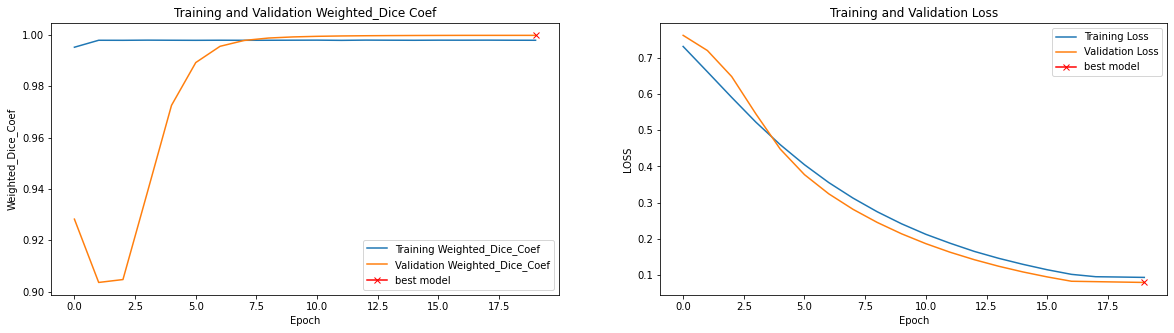

In [ ]:
#Plotting the metrics:

plt.figure(figsize=(20, 5))

#Plotting the Dice_Coef:
plt.subplot(1, 2, 1)
plt.plot(w_dice_coef, label='Training Weighted_Dice_Coef')
plt.plot(val_w_dice_coef, label='Validation Weighted_Dice_Coef')
plt.plot( np.argmax(val_w_dice_coef), np.max(val_w_dice_coef), marker="x", color="r", label="best model")

plt.legend(loc='lower right')
plt.ylabel('Weighted_Dice_Coef')
plt.xlabel('Epoch')
plt.title('Training and Validation Weighted_Dice Coef')

#Plotting the Loss:
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.plot( np.argmin(val_loss), np.min(val_loss), marker="x", color="r", label="best model")
plt.legend(loc='upper right')
plt.ylabel('LOSS')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')

In [ ]:
segment_valid1 = nested_unet_model_noAug1.evaluate(dvalid,batch_size=16)

76/76 [==============================] - 7s 98ms/step - loss: 0.1244 - w_dice_coef: 0.9997


In [ ]:
print('Valid Loss : ',segment_valid1[0])
print('Valid Weighted Dice-Coef : ',segment_valid1[1])

Valid Loss :  0.12443019449710846
Valid Weighted Dice-Coef :  0.9997079968452454


***Displaying the segmented masks:***

In [59]:
nested_unet_model_noAug1.load_weights("/content/drive/MyDrive/Self Case Study 2/DATASET/best_nestedUnetModel_noAug.hdf5")

In [187]:
def predict_mask_nestedUnet_noAug(x,y):
    img = read_image(x)
    og_mask = read_mask(y)
    predicted_mask  = nested_unet_model_noAug1.predict(img[np.newaxis,:,:,:])
    #predicted_mask = model.predict(tf.expand_dims(img,axis=0))
    return img,og_mask,predicted_mask

In [255]:
image = final_train_df['ImagePath_Png'][1]
mask = final_train_df['MaskPath'][1]
img,og_mask,predicted_mask = predict_mask_nestedUnet_noAug(image,mask)

In [62]:
predicted_mask

array([[[[1.7585118e-01],
         [7.2139807e-02],
         [3.6647987e-02],
         ...,
         [3.5910603e-02],
         [7.2703272e-02],
         [1.6941550e-01]],

        [[7.3850401e-02],
         [1.3340157e-02],
         [4.0877648e-03],
         ...,
         [4.0261955e-03],
         [1.4799716e-02],
         [7.3473081e-02]],

        [[3.6961012e-02],
         [4.0268553e-03],
         [7.6232583e-04],
         ...,
         [7.7813829e-04],
         [4.3837330e-03],
         [3.8388353e-02]],

        ...,

        [[4.7680531e-03],
         [9.0557420e-05],
         [5.1832080e-06],
         ...,
         [3.9353580e-04],
         [2.8819644e-03],
         [3.2539599e-02]],

        [[1.6826026e-02],
         [1.0297166e-03],
         [1.1310585e-04],
         ...,
         [2.7710076e-03],
         [1.1319681e-02],
         [6.7442648e-02]],

        [[8.2440592e-02],
         [1.6887531e-02],
         [5.2983728e-03],
         ...,
         [3.1290006e-02],
        

In [128]:
# Trying to find the best value as the threshold parameter:

arr = predicted_mask.flatten()
for i in range(1,101,10):
    print(i,np.percentile(arr,i))
print('100', np.percentile(arr,100))

1 2.847394326557855e-17
11 3.904816719941347e-15
21 1.426605678411081e-14
31 3.9076181967110946e-14
41 1.377517105374467e-13
51 4.87948334623907e-13
61 2.3836966471860165e-12
71 1.4753961333907603e-11
81 7.056672746141857e-11
91 6.762955945260883e-10
100 0.17585118114948273


Using the 91%ile value (6.76e-10) as the tresholding parameter.

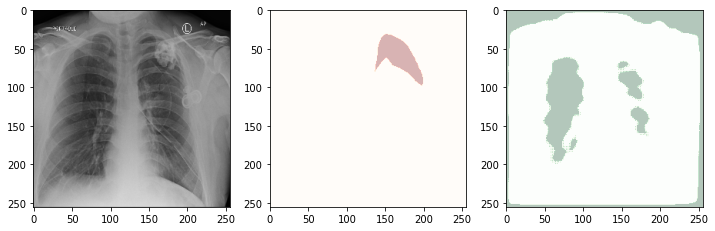

In [156]:
fig, axs = plt.subplots(1, 3, figsize=(3*4, 1*4))
print(axs)
axs[0].imshow(img)
axs[1].imshow(og_mask[:,:,0],cmap='OrRd', alpha=0.3)
axs[2].imshow(np.squeeze(predicted_mask[0,:,:,0]>6.76*10**-10), cmap='Greens', alpha = 0.3)
plt.show()

We got better segmented mask as prediction in comparison with the UNET architecture. But it is still not very good.

***Getting the dice coefs for each train images:***

In [ ]:
def w_dice_coef(y_true, y_pred, w_0=0.22, w_1=0.78):
    
    y_true_f_1 = K.flatten(y_true)
    y_pred_f_1 = K.flatten(y_pred)
    y_true_f_0 = K.flatten(1-y_true)
    y_pred_f_0 = K.flatten(1-y_pred)

    intersection_0 = K.sum(y_true_f_0 * y_pred_f_0)
    intersection_1 = K.sum(y_true_f_1 * y_pred_f_1)

    return (2 * (w_0 * intersection_0 + w_1 * intersection_1) / 
            ((w_0 * (K.sum(y_true_f_0) + K.sum(y_pred_f_0))) + (w_1 * (K.sum(y_true_f_1) + K.sum(y_pred_f_1)))))

In [ ]:
dice_coefs_nu = []
for i in tqdm(range(len(final_train_df))):
    image = final_train_df['ImagePath_Png'].values[i]
    mask = final_train_df['MaskPath'].values[i]
    img,og_mask,predicted_mask = predict_mask_nestedUnet_noAug(image,mask)
    og_mask = np.expand_dims(og_mask, axis=0)
    y_true = K.flatten(og_mask)
    y_pred = K.flatten(predicted_mask)
    dice = w_dice_coef(y_true, y_pred,w_0=0.22, w_1=0.78)
    dice_coefs_nu.append(dice.numpy())

print("Done")

100%|██████████| 12047/12047 [09:38<00:00, 20.82it/s]

Done


In [ ]:
final_output_train_df['dice_coefs_weightedNestedUnet'] = dice_coefs_nu

In [ ]:
final_output_train_df['dice_coefs_weightedNestedUnet'].describe()

count    12047.000000
mean         0.671823
std          0.203687
min          0.024544
25%          0.636706
50%          0.737210
75%          0.802324
max          0.994077
Name: dice_coefs_weightedNestedUnet, dtype: float64

In [ ]:
# Saving the Unet Dice-Coef for all images as a column
final_output_train_df.to_csv('/content/drive/MyDrive/Self Case Study 2/DATASET/final_output_train_df.csv')

In [ ]:
final_output_train_df = pd.read_csv('/content/drive/MyDrive/Self Case Study 2/DATASET/final_output_train_df.csv')

In [ ]:
final_output_train_df.head(2)

Unnamed: 0  ...  dice_coefs_weightedNestedUnet
0           0  ...                       0.756586
1           1  ...                       0.113973

[2 rows x 10 columns]

Getting all the images with dice-coefs of the weighted nested unet model (best one till now) less than 0.5.

In [ ]:
low_diceValue_df = final_output_train_df[final_output_train_df['dice_coefs_weightedNestedUnet'] <= 0.5]
low_diceValue_df.head(2)

Unnamed: 0  ...  dice_coefs_weightedNestedUnet
1           1  ...                       0.113973
3           3  ...                       0.405229

[2 rows x 10 columns]

In [ ]:
print('Total Number of Images with Low Dice Value : ', low_diceValue_df.shape[0])

Total Number of Images with Low Dice Value :  2141


Getting all the images with dice-coefs of the weighted nested unet model (best one till now) more than 0.5.

In [ ]:
high_diceValue_df = final_output_train_df[final_output_train_df['dice_coefs_weightedNestedUnet'] > 0.5]
high_diceValue_df.head(2)

Unnamed: 0  ...  dice_coefs_weightedNestedUnet
0           0  ...                       0.756586
2           2  ...                       0.696152

[2 rows x 10 columns]

In [ ]:
print('Total Number of Images with High Dice Value : ', high_diceValue_df.shape[0])

Total Number of Images with High Dice Value :  9906


***Plotting the images with low dice-coefs:***

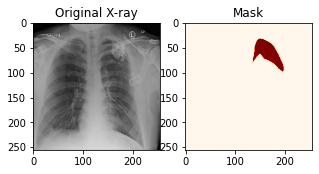

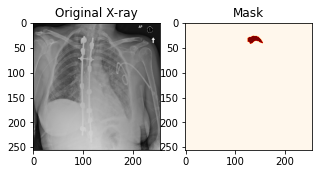

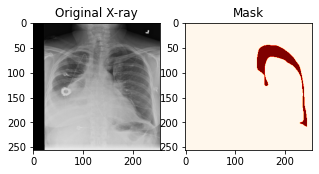

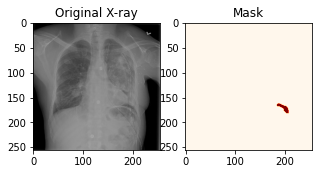

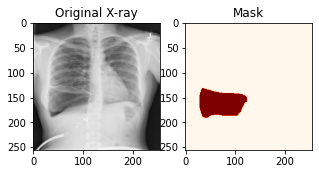

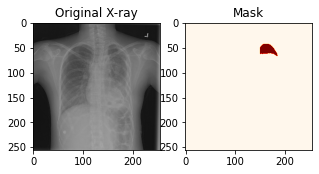

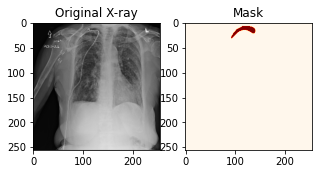

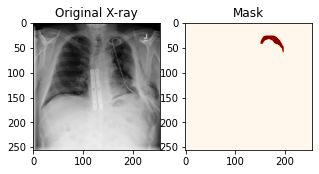

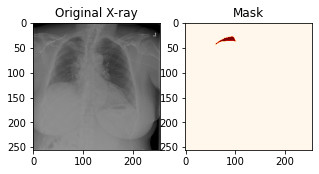

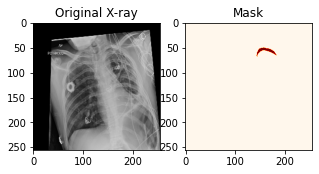

In [ ]:
max_images = 10

for i in range(max_images):
    img = low_diceValue_df['ImagePath_Png'].values[i]
    msk = low_diceValue_df['MaskPath'].values[i]
    # original image
    image_orig = read_image(img)
    # original mask
    image_mask_orig = read_mask(msk)
    # plot Original X-ray
    fig = plt.figure(figsize=(5, 5))
    a = fig.add_subplot(1, 2, 1)
    plt.imshow(image_orig, cmap='bone')
    a.set_title("Original X-ray")

    # Plotting mask only
    a = fig.add_subplot(1, 2, 2)
    plt.imshow(np.squeeze(image_mask_orig), cmap='OrRd', alpha=1)
    a.set_title("Mask")
plt.show()

It seems images with masks have low dice-coefs.

***Plotting Images with high dice coefs:***

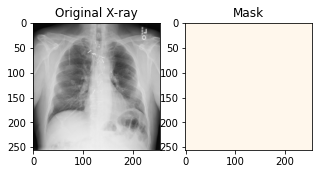

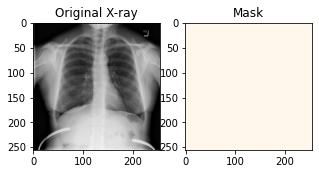

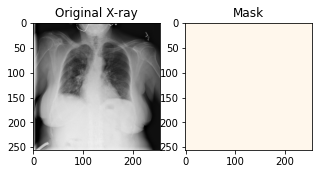

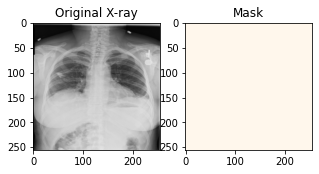

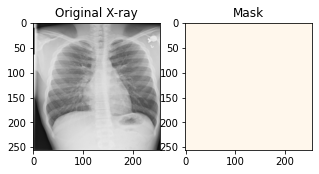

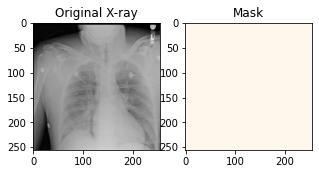

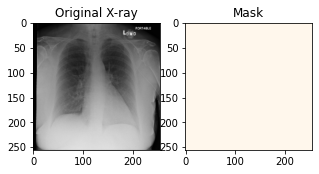

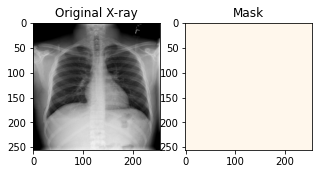

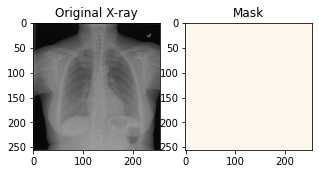

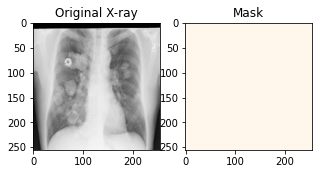

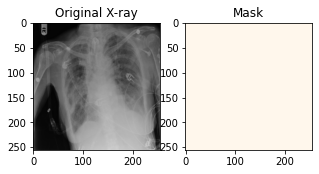

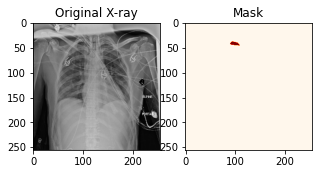

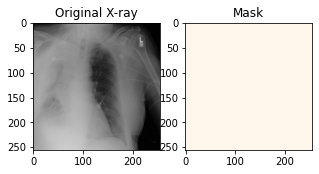

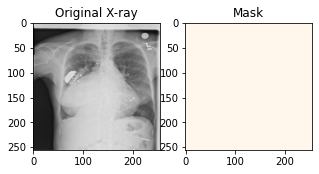

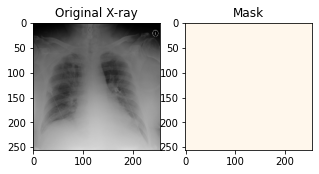

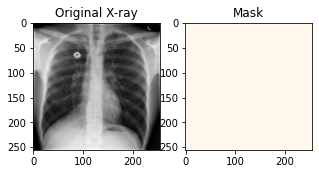

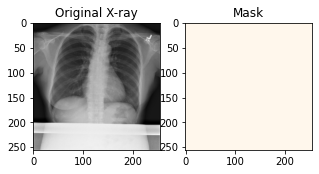

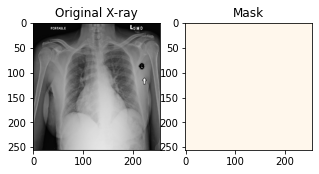

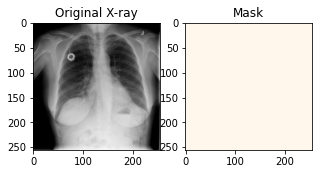

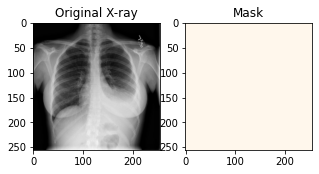

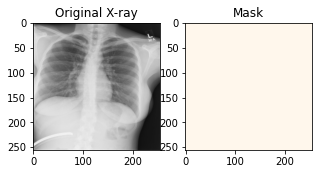

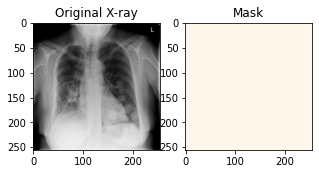

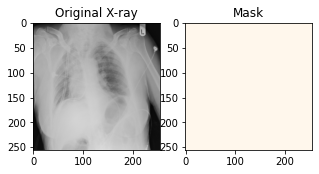

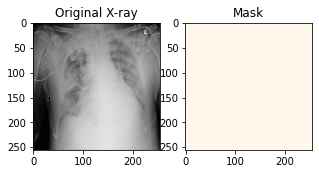

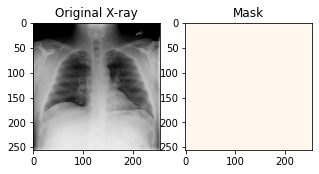

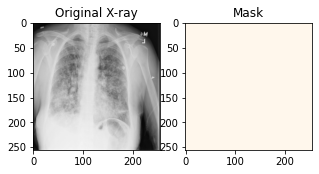

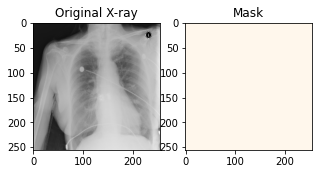

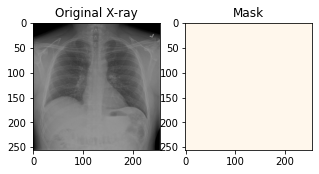

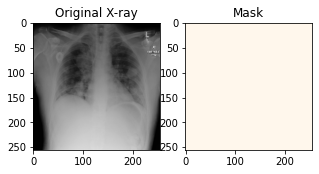

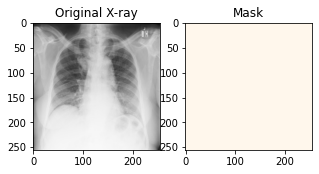

In [ ]:
max_images = 30

for i in range(max_images):
    img = high_diceValue_df['ImagePath_Png'].values[i]
    msk = high_diceValue_df['MaskPath'].values[i]
    # read the original image
    image_orig = read_image(img)
    # read the original mask
    image_mask_orig = read_mask(msk)
    # plot Original X-ray
    fig = plt.figure(figsize=(5, 5))
    a = fig.add_subplot(1, 2, 1)
    plt.imshow(image_orig, cmap='bone')
    a.set_title(f"Original X-ray")

    # Plotting mask only
    a = fig.add_subplot(1, 2, 2)
    plt.imshow(np.squeeze(image_mask_orig), cmap='OrRd', alpha=1)
    a.set_title("Mask")
plt.show()

Images with no mask are found to have high dice-coefs (higher than 0.5).

Weighted Nested Unet model seems to be the better performing models out of the above three as it had low loss and high dice-scores.

But the predicted segmented mask is not very satisfactory.



Let's try with a pre-trained model as a backbone.

**Segmentation Model : 4**

***Creating the Double UNET Architecture with VGG19 as backbone for the encoder part :***

In [238]:
#https://www.kaggle.com/danofer/ranzcr-chexnet-starter
#https://www.tensorflow.org/tutorials/images/data_augmentation

def read_image(x):
    file_bytes = tf.io.read_file(x)
    img = tf.image.decode_png(file_bytes, channels=3)
    img = tf.cast(img, tf.float32) / 255.0
    print(img)
    return img

def read_mask(x):
    file_bytes = tf.io.read_file(x)
    mask = tf.image.decode_png(file_bytes, channels=1)
    mask = tf.cast(mask, tf.float32) / 255.0
    print(mask)
    return mask

def augmenter(x,y, augment):
    img = read_image(x)

    #Channel First Format
    img = tf.transpose(img, [2,0,1])

    mask = read_mask(y)

    #Channel First Format
    mask = tf.transpose(mask, [2,0,1])


    # Random Augmentations to Image and Mask
    '''if augment == True:
        number = random.randint(1,5)
        seed = (1, 5)
        if number == 1:
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.stateless_random_contrast(img,0.2, 0.5,seed)

            mask = tf.image.stateless_random_flip_left_right(mask,seed)
            mask = tf.image.stateless_random_contrast(mask,0.2, 0.5,seed)

        if number == 2:
            img = tf.image.stateless_random_flip_up_down(img,seed)
            img = tf.image.stateless_random_brightness(img, 0.2,seed)

            mask = tf.image.stateless_random_flip_left_right(mask,seed)
            mask = tf.image.stateless_random_brightness(mask,0.2,seed)

        if number == 3:
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.stateless_random_saturation(img, 0.2, 0.5,seed)

            mask = tf.image.stateless_random_flip_left_right(mask,seed)
            mask = tf.image.stateless_random_saturation(mask,0.2, 0.5,seed)

        if number == 4:
            img = tf.image.stateless_random_flip_up_down(img,seed)
            img = tf.image.stateless_random_hue(img, 0.2,seed)

            mask = tf.image.stateless_random_flip_up_down(mask,seed)
            mask = tf.image.stateless_random_hue(mask,0.2,seed)

        if number == 5:
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.adjust_gamma(img, 0.2)

            mask = tf.image.stateless_random_flip_left_right(mask,seed)
            mask = tf.image.adjust_gamma(mask,0.2)'''
      
    mask = Concatenate(axis=0)([mask, mask])

    return img,mask

In [239]:
#https://www.kaggle.com/danofer/ranzcr-chexnet-starter
#https://www.tensorflow.org/tutorials/images/data_augmentation
#
def build_dataset(image_paths, mask_paths = None, bsize=32, cache=True,cache_dir="",
                  augment=True, repeat=True, shuffle=1024):
    if cache_dir != "" and cache is True:
        os.makedirs(cache_dir, exist_ok=True)
    
    AUTO = tf.data.experimental.AUTOTUNE
    slices = image_paths if mask_paths is None else (image_paths, mask_paths)
    
    dset = tf.data.Dataset.from_tensor_slices(slices)
    dset = dset.cache(cache_dir) if cache else dset
    dset = dset.map(lambda x,y: augmenter(x,y,augment), num_parallel_calls=AUTO)
    dset = dset.repeat() if repeat else dset
    dset = dset.shuffle(shuffle) if shuffle else dset
    dset = dset.batch(bsize).prefetch(AUTO)
    
    return dset

In [240]:
dtrain_du = build_dataset(
    trainPath, trainLabels, bsize=16, cache_dir='Kaggle2/tf_cache'
)

dvalid_du = build_dataset(
    validPath, validLabels, bsize=16, 
    repeat=False, shuffle=False, augment=False, cache_dir='Kaggle2/tf_cache'
)

Tensor("truediv:0", shape=(None, None, 3), dtype=float32)
Tensor("truediv_1:0", shape=(None, None, 1), dtype=float32)
Tensor("truediv:0", shape=(None, None, 3), dtype=float32)
Tensor("truediv_1:0", shape=(None, None, 1), dtype=float32)


In [241]:
dtrain_du,dvalid_du

(<PrefetchDataset shapes: ((None, 3, None, None), (None, 2, None, None)), types: (tf.float32, tf.float32)>,
 <PrefetchDataset shapes: ((None, 3, None, None), (None, 2, None, None)), types: (tf.float32, tf.float32)>)

In [160]:
##https://harshjadhav100.medium.com/siim-acr-pneumothorax-segmentation-d92af3086b51

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications import *

def squeeze_excite_block(inputs, ratio=8):
    init = inputs
    channel_axis = 1
    filters = init.shape[channel_axis]
    se_shape = (filters, 1, 1)

    se = GlobalAveragePooling2D(data_format='channels_first')(init)
    # se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)
    se = Reshape(se_shape)(se)
    print(se.shape)

    x = Multiply()([init, se])
    return x

def conv_block(inputs, filters):
    x = inputs

    x = Conv2D(filters, (3, 3), padding="same",data_format='channels_first')(x)
    x = BatchNormalization(axis=1)(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, (3, 3), padding="same",data_format='channels_first')(x)
    x = BatchNormalization(axis=1)(x)
    x = Activation('relu')(x)

    x = squeeze_excite_block(x)

    return x

def encoder1(inputs):
    skip_connections = []

    model = VGG19(include_top=False, weights='imagenet', input_tensor=inputs, input_shape=(3,256,256))
    # names = ["block1_conv2", "block2_conv2", "block3_conv4", "block4_conv4"]
    names = [ "block1_conv2", "block2_conv2"]
    for name in names:
        skip_connections.append(model.get_layer(name).output)


    output = model.get_layer("block3_conv4").output
    return output, skip_connections

def decoder1(inputs, skip_connections):
    # num_filters = [256, 128, 64, 32]
    num_filters = [64, 32]
    skip_connections.reverse()
    
    x = inputs

    for i, f in enumerate(num_filters):
        # x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = UpSampling2D((2, 2), interpolation='bilinear',data_format='channels_first')(x)
        # print(x.shape, skip_connections[i].shape)
        x = Concatenate(axis=1)([x, skip_connections[i]])
        x = conv_block(x, f)

    return x

def encoder2(inputs):
    num_filters = [32, 64]
    skip_connections = []
    x = inputs

    for i, f in enumerate(num_filters):
        x = conv_block(x, f)
        skip_connections.append(x)
        x = MaxPool2D((2, 2),data_format='channels_first')(x)

    return x, skip_connections

def decoder2(inputs, skip_1, skip_2):
    # num_filters = [256, 128, 64, 32]
    num_filters = [256, 128]
    skip_2.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear',data_format='channels_first')(x)
        x = Concatenate(axis=1)([x, skip_1[i], skip_2[i]])
        x = conv_block(x, f)

    return x

def output_block(inputs):
    x = Conv2D(1, (1, 1), padding="same",data_format='channels_first')(inputs)
    x = Activation('sigmoid')(x)
    return x

def Upsample(tensor, size):
    """Bilinear upsampling"""
    def _upsample(x, size):
        return tf.image.resize(images=x, size=size)
    return Lambda(lambda x: _upsample(x, size), output_shape=size)(tensor)

def ASPP(x, filter):
    shape = x.shape

    y1 = AveragePooling2D(pool_size=(shape[2], shape[3]),data_format='channels_first')(x)
    y1 = Conv2D(filter, 1, padding="same",data_format='channels_first')(y1)
    y1 = BatchNormalization(axis=1)(y1)
    y1 = Activation("relu")(y1)
    y1 = UpSampling2D((shape[2], shape[3]), interpolation='bilinear',data_format='channels_first')(y1)

    y2 = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False,data_format='channels_first')(x)
    y2 = BatchNormalization(axis=1)(y2)
    y2 = Activation("relu")(y2)

    y3 = Conv2D(filter, 3, dilation_rate=6, padding="same", use_bias=False,data_format='channels_first')(x)
    y3 = BatchNormalization(axis=1)(y3)
    y3 = Activation("relu")(y3)

    y4 = Conv2D(filter, 3, dilation_rate=12, padding="same", use_bias=False,data_format='channels_first')(x)
    y4 = BatchNormalization(axis=1)(y4)
    y4 = Activation("relu")(y4)

    y5 = Conv2D(filter, 3, dilation_rate=18, padding="same", use_bias=False,data_format='channels_first')(x)
    y5 = BatchNormalization(axis=1)(y5)
    y5 = Activation("relu")(y5)

    y = Concatenate(axis=1)([y1, y2, y3, y4, y5])

    y = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False,data_format='channels_first')(y)
    y = BatchNormalization(axis=1)(y)
    y = Activation("relu")(y)

    return y

def build_model(shape):
    inputs = Input(shape)
    x, skip_1 = encoder1(inputs)
    x = ASPP(x, 64)
    x = decoder1(x, skip_1)
    outputs1 = output_block(x)

    x = inputs * outputs1

    x, skip_2 = encoder2(x)
    x = ASPP(x, 64)
    x = decoder2(x, skip_1, skip_2)
    outputs2 = output_block(x)
    outputs = Concatenate(axis=1)([outputs1, outputs2])

    model = Model(inputs, outputs)
    return model


In [256]:
# Creating the model with Channel First Mode :

K.set_image_data_format('channels_first')
inp_shape = (3,256,256)
double_unet_model = build_model(inp_shape)
double_unet_model.summary()

(None, 64, 1, 1)
(None, 32, 1, 1)
(None, 32, 1, 1)
(None, 64, 1, 1)
(None, 256, 1, 1)
(None, 128, 1, 1)
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 3, 256, 256) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 64, 256, 256) 1792        input_8[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 64, 256, 256) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 64, 128, 128) 0           block1_conv2[0][0]    

In [162]:
smooth = 1.
def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + smooth) / (union + smooth)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)

def bce_dice_loss(y_true, y_pred):
    
    return binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)

In [198]:
import datetime
from tensorflow.keras.optimizers import Adam

# Define optimizer
optim = tf.keras.optimizers.Adam(0.0001)

filepath= "best_Double_Unet_new.hdf5"

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_dice_coef', 
                             verbose=1, save_best_only=True, mode='max',restore_best_weights=True)

#Callback for the ReduceLROnPlateau
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_dice_coef", patience=3, min_lr=1e-6, mode='max')


#Callback to stop training if the metric value doesnt change for 6 epochs
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_dice_coef', min_delta=0.0001, patience=6, mode='max',restore_best_weights=True)

callback_list_new = [checkpoint,lr_reducer,early_stop]
callback_list1 = [checkpoint,lr_reducer]
callback_list_new1 = [checkpoint]
weighted_train_steps_per_epoch = 10842//16 
weighted_val_steps_per_epoch = 1205 // 16 

In [257]:
double_unet_model.compile(optimizer=optim, loss=bce_dice_loss, metrics=[dice_coef])

In [243]:
double_Unet_history = double_unet_model.fit(dtrain_du,
                    validation_data=dvalid_du,
                    epochs=30, 
                    verbose=1, 
                    callbacks=callback_list_new1,
                    steps_per_epoch=weighted_train_steps_per_epoch,
                    validation_steps=1205 // 16)

Epoch 1/30
677/677 [==============================] - 635s 927ms/step - loss: 1.1497 - dice_coef: 2.1141e-05 - val_loss: 1.0374 - val_dice_coef: 2.8613e-05

Epoch 00001: val_dice_coef improved from -inf to 0.00003, saving model to best_Double_Unet_new.hdf5
Epoch 2/30
677/677 [==============================] - 627s 926ms/step - loss: 1.0475 - dice_coef: 2.9750e-05 - val_loss: 1.0271 - val_dice_coef: 3.3734e-05

Epoch 00002: val_dice_coef improved from 0.00003 to 0.00003, saving model to best_Double_Unet_new.hdf5
Epoch 3/30
677/677 [==============================] - 627s 926ms/step - loss: 1.0220 - dice_coef: 4.0791e-05 - val_loss: 1.0132 - val_dice_coef: 5.2844e-05

Epoch 00003: val_dice_coef improved from 0.00003 to 0.00005, saving model to best_Double_Unet_new.hdf5
Epoch 4/30
677/677 [==============================] - 627s 927ms/step - loss: 1.0114 - dice_coef: 6.1970e-05 - val_loss: 1.0063 - val_dice_coef: 9.0145e-05

Epoch 00004: val_dice_coef improved from 0.00005 to 0.00009, savin

In [244]:
#Saving the model back in the google drive:
!cp  "/content/Pneumothorax/best_Double_Unet_new.hdf5" "/content/drive/MyDrive/Self Case Study 2/DATASET/best_Double_Unet_new.hdf5"

***Plotting the metrics:***

In [245]:
loss = double_Unet_history.history['loss']
dice_coef = double_Unet_history.history['dice_coef']
val_loss = double_Unet_history.history['val_loss']
val_dice_coef = double_Unet_history.history['val_dice_coef']

Text(0.5, 0, 'Epoch')

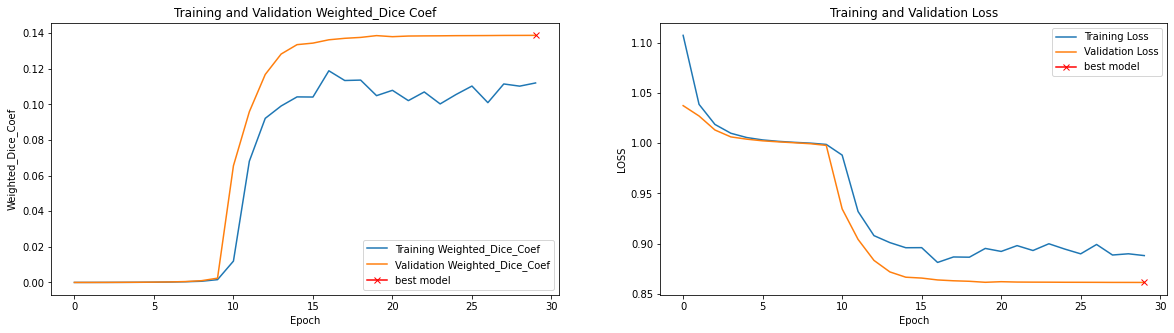

In [247]:
#Plotting the metrics:

plt.figure(figsize=(20, 5))

#Plotting the Dice_Coef:
plt.subplot(1, 2, 1)
plt.plot(dice_coef, label='Training Weighted_Dice_Coef')
plt.plot(val_dice_coef, label='Validation Weighted_Dice_Coef')
plt.plot( np.argmax(val_dice_coef), np.max(val_dice_coef), marker="x", color="r", label="best model")

plt.legend(loc='lower right')
plt.ylabel('Weighted_Dice_Coef')
plt.xlabel('Epoch')
plt.title('Training and Validation Weighted_Dice Coef')

#Plotting the Loss:
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.plot( np.argmin(val_loss), np.min(val_loss), marker="x", color="r", label="best model")
plt.legend(loc='upper right')
plt.ylabel('LOSS')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')

Loading the model:

In [258]:
double_unet_model.load_weights('/content/drive/MyDrive/Self Case Study 2/DATASET/best_Double_Unet_new.hdf5')

In [248]:
def read_image(path):
   
    x = tf.io.read_file(path)
    x = tf.image.decode_png(x, channels=3)
    x = tf.image.convert_image_dtype(x, tf.float32)
    return x

def read_mask(path):
    
    y = tf.io.read_file(path)
    y = tf.image.decode_png(y, channels=1)
    y = tf.image.convert_image_dtype(y, tf.float32)
    return y

In [252]:
def Predict(x, y):
    
    # Original image
    image_orig = read_image(x)

    # Original mask
    image_mask_orig = read_mask(y)

    # Reshape image and mask as first channel image format
    image = tf.transpose(image_orig, [2,0,1])
    image_mask = tf.transpose(image_mask_orig, [2,0,1])
    
    # predict the mask using trained model
    predict_mask = double_unet_model.predict(tf.expand_dims(image, axis=0))

    #Converting the output from the shape : [None,2,256,256] to the shape needed for display : [None,256,256,2]
    predict_mask = tf.transpose(predict_mask, [0,2,3,1])

    return image_orig, image_mask_orig, predict_mask

***Building a grid of 16 images:***

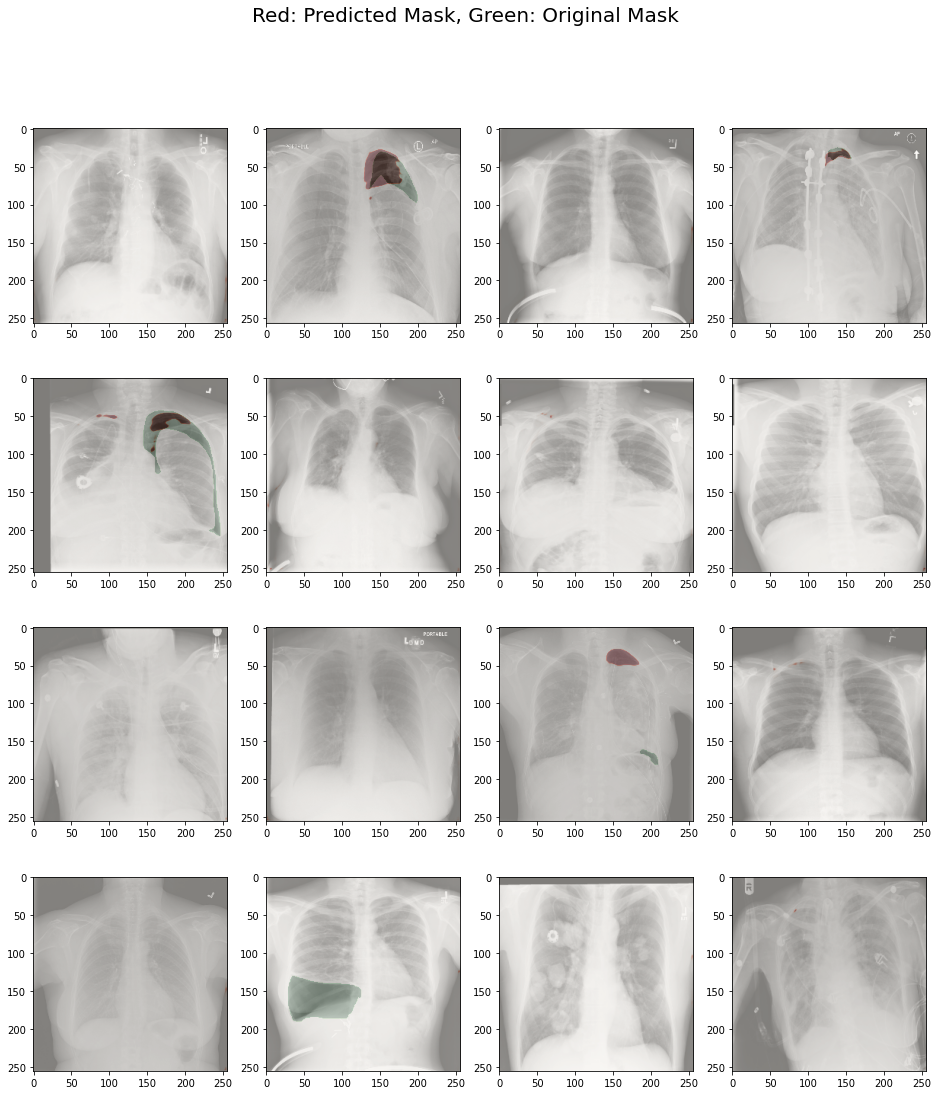

In [253]:
max_images = 16
grid_width = 4
grid_height = int(max_images / grid_width)
fig, axs = plt.subplots(grid_height, grid_width, figsize=(grid_width*4, grid_height*4))
fig.subplots_adjust(bottom = 0.05)

for i in range(max_images):
    img = final_train_df['ImagePath_Png'].values[i]
    msk = final_train_df['MaskPath'].values[i]
    image_orig, image_mask_orig, predict_mask = Predict(img, msk)

    ax = axs[int(i / grid_width), i % grid_width]
    ax.imshow(image_orig)
    ax.imshow(image_mask_orig[:,:,0], cmap='Greens', alpha = 0.3)      
    ax.imshow(np.squeeze(predict_mask[:,:,:,1]), cmap='Reds', alpha = 0.3)
    # ax.axis('off')
plt.suptitle("Red: Predicted Mask, Green: Original Mask", fontsize=20)
plt.show()

The last architecture Double UNET with VGG19 as backbone encoder gave the best mask prediction out of the above 4 architectures that we have tried.




It is still not the best. We can obviously modify the architecture and improve it a lot better. But for the time being we will consider this last model as our final one for this case study.

We will be using this model in the final pipeline.